In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
# sklearn
# formulaic

In [2]:
datos = pd.read_csv("full_data.csv")

# Procesamiento de datos

## Ejercicio 1

In [3]:
columnas_a_mantener = [
    "station_id",
    "num_bikes_available",
    "num_bikes_disabled",
    "num_docks_available",
    "num_docks_disabled",
    "Date",
    "hora",
    "dia"
]

datos_limpios = datos[columnas_a_mantener].copy()

datos_limpios

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,Date,hora,dia
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday
...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Friday
12524,420,3,3,6,0,2026-02-06,15:36:04,Friday
12525,464,1,0,19,0,2026-02-06,15:36:04,Friday
12526,420,1,3,8,0,2026-02-06,16:31:56,Friday


## Ejercicio 2

In [4]:
diccionario_de_traduccion = {
    "station_id": "estacion",
    "num_bikes_available": "bicis_disponibles",
    "num_bikes_disabled": "bicis_rotas",
    "num_docks_available": "puertos_disponibles",
    "num_docks_disabled": "puertos_rotos",
    "Date": "fecha",
    "hora": "horario",
    "dia": "dia_semana"
}

datos_limpios = datos_limpios.rename(columns=diccionario_de_traduccion)

datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday
...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Friday
12524,420,3,3,6,0,2026-02-06,15:36:04,Friday
12525,464,1,0,19,0,2026-02-06,15:36:04,Friday
12526,420,1,3,8,0,2026-02-06,16:31:56,Friday


## Ejercicio 3

In [5]:
diccionario_de_dias = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

datos_limpios["dia_semana"] = datos["dia"].map(diccionario_de_dias)

## Ejercicio 4

In [6]:
datos_limpios.dtypes

estacion                int64
bicis_disponibles       int64
bicis_rotas             int64
puertos_disponibles     int64
puertos_rotos           int64
fecha                  object
horario                object
dia_semana             object
dtype: object

## Ejercicio 5

In [7]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   estacion             12528 non-null  int64 
 1   bicis_disponibles    12528 non-null  int64 
 2   bicis_rotas          12528 non-null  int64 
 3   puertos_disponibles  12528 non-null  int64 
 4   puertos_rotos        12528 non-null  int64 
 5   fecha                12528 non-null  object
 6   horario              12528 non-null  object
 7   dia_semana           12528 non-null  object
dtypes: int64(5), object(3)
memory usage: 783.1+ KB


In [8]:
datos_limpios.isna().sum()

estacion               0
bicis_disponibles      0
bicis_rotas            0
puertos_disponibles    0
puertos_rotos          0
fecha                  0
horario                0
dia_semana             0
dtype: int64

No contiene datos faltantes, solo la columna 'traffic' completa, la cual fue eliminada en el ejercicio 1.

## Ejercicio 6

In [9]:
# Extracción de fecha para hacer anio, mes y día, formato yyyy-mm-dd en strings

datos_limpios['anio'] = datos_limpios['fecha'].str[0:4]
datos_limpios['mes']  = datos_limpios['fecha'].str[5:7]
datos_limpios['dia']  = datos_limpios['fecha'].str[8:10]

# Lo mismo para horario pero solo guardo hora
datos_limpios['hora'] = datos_limpios['horario'].str[0:2]


columnas_de_tiempo_transformadas_a_numeros = ['anio', 'mes', 'dia', 'hora']
datos_limpios[columnas_de_tiempo_transformadas_a_numeros] = datos_limpios[columnas_de_tiempo_transformadas_a_numeros].apply(pd.to_numeric)

datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16


In [10]:
datos_limpios.dtypes

estacion                int64
bicis_disponibles       int64
bicis_rotas             int64
puertos_disponibles     int64
puertos_rotos           int64
fecha                  object
horario                object
dia_semana             object
anio                    int64
mes                     int64
dia                     int64
hora                    int64
dtype: object

## Ejercicio 7

7. Otra forma de manejar las fechas y horas es pasarlas al formato datetime. Para esto, usaremos
el siguiente bloque de c´odigo:
datos_limpios["fecha"] =
pd.to_datetime(datos_limpios["fecha"])
datos_limpios["hora"] =
pd.to_datetime(datos_limpios["hora"]).dt.time

In [11]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16


In [12]:
datos_limpios["fecha"] = pd.to_datetime(datos_limpios["fecha"])
datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"], format="%H:%M:%S").dt.time

# Faltaba agregar el formato del dato, en este caso la hora.
# El formato es %H:%M:%S, donde %H es hora en formato 24hs, %M es minutos, y %S es segundos

In [13]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16


In [14]:
datos_limpios.dtypes

estacion                        int64
bicis_disponibles               int64
bicis_rotas                     int64
puertos_disponibles             int64
puertos_rotos                   int64
fecha                  datetime64[ns]
horario                        object
dia_semana                     object
anio                            int64
mes                             int64
dia                             int64
hora                            int64
dtype: object

## Ejercicio 8

In [15]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16


 Implement´a una funci´on llamada determinar_estacion_anio que permita construir una variable llamada estacion_anio al pasarle nuestros datos. 
 
 La variable puede estar construida a partir de las variables ”dia” y ”mes” o de la variable ”fecha” (opci´on para valientes).

In [16]:
datos_limpios.groupby("anio")["fecha"].nunique()

anio
2025    248
2026     37
Name: fecha, dtype: int64

In [17]:
def determinar_estacion_anio(row):
    fecha = row['fecha']
    anio = fecha.year
    
    empieza_otonio     = pd.Timestamp(year=anio, month=3,  day=21)
    empieza_invierno  = pd.Timestamp(year=anio, month=6,  day=21)
    empieza_primavera = pd.Timestamp(year=anio, month=9,  day=21)
    empieza_verano    = pd.Timestamp(year=anio, month=12, day=21)

    if empieza_otonio <= fecha < empieza_invierno:
        return "Otoño"
    elif empieza_invierno <= fecha < empieza_primavera:
        return "Invierno"
    elif empieza_primavera <= fecha < empieza_verano:
        return "Primavera"
    else:
        return "Verano"

datos_limpios['estacion_anio'] = datos_limpios.apply(determinar_estacion_anio, axis=1)

In [18]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1,Otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14,Verano
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16,Verano


In [19]:
datos_limpios.groupby("mes")["estacion_anio"].value_counts()

mes  estacion_anio
1    Verano           1336
2    Verano            222
4    Otoño              92
5    Otoño            1408
6    Otoño             880
     Invierno          428
7    Invierno         1322
8    Invierno         1378
9    Invierno          908
     Primavera         446
10   Primavera        1406
11   Primavera        1346
12   Primavera         880
     Verano            476
Name: count, dtype: int64

# Análisis descriptivos

## Ejercicio 9

Quisieramos analizar la cantidad de bicis disponibles por hora, la cantidad de bicis rotas, y la cantidad de puertos disponibles en todo Ciudad Universitaria
 
(es decir, sumando la informacion de las dos estaciones). 
 
Para eso, generen un nuevo dataframe agrupado por fecha y hora llamado datos agrupados que contenga las variables ”cantidad bicis disponibles”, ”cantidad bicis rotas”, ”cantidad puertos disponibles”, y conserve las variables ”fecha”, ”hora”,
”dia semana”, ”dia”, ”mes” y ”anio”.

In [20]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1,Otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14,Verano
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16,Verano


In [21]:
cantidad_bicis_disponibles = datos_limpios["bicis_disponibles"].sum()
print(f"Cantidad de bicis disponibles: {cantidad_bicis_disponibles}")
cantidad_bicis_rotas = datos_limpios["bicis_rotas"].sum()
print(f"Cantidad de bicis rotas: {cantidad_bicis_rotas}")
cantidad_puertos_disponibles = datos_limpios["puertos_disponibles"].sum()
print(f"Cantidad de puertos disponibles: {cantidad_puertos_disponibles}")

Cantidad de bicis disponibles: 56929
Cantidad de bicis rotas: 15834
Cantidad de puertos disponibles: 127442


In [22]:
datos_eda = datos_limpios[["bicis_disponibles","bicis_rotas","puertos_disponibles","fecha","hora","dia_semana","dia","mes","anio", "estacion_anio"]]
datos_eda

,bicis_disponibles,bicis_rotas,puertos_disponibles,fecha,hora,dia_semana,dia,mes,anio,estacion_anio
0,3,1,8,2025-04-28,23,Lunes,28,4,2025,Otoño
1,11,2,7,2025-04-28,23,Lunes,28,4,2025,Otoño
2,5,1,6,2025-04-29,0,Martes,29,4,2025,Otoño
3,11,2,7,2025-04-29,0,Martes,29,4,2025,Otoño
4,5,1,6,2025-04-29,1,Martes,29,4,2025,Otoño
...,...,...,...,...,...,...,...,...,...,...
12523,1,0,19,2026-02-06,14,Viernes,6,2,2026,Verano
12524,3,3,6,2026-02-06,15,Viernes,6,2,2026,Verano
12525,1,0,19,2026-02-06,15,Viernes,6,2,2026,Verano
12526,1,3,8,2026-02-06,16,Viernes,6,2,2026,Verano


In [23]:
datos_eda_agrupados = datos_eda.groupby(["fecha", "hora"]).agg({
    "bicis_disponibles": "sum",
    "bicis_rotas": "sum",
    "puertos_disponibles": "sum",
    "dia_semana": "first",
    "dia": "first",
    "mes": "first",
    "anio": "first",
    "estacion_anio": "first"
}).reset_index()

# Pero con aggregate no estoy creando las variables en sí, debería renombrarlas y listo, no?


In [24]:
datos_eda_agrupados = datos_eda_agrupados.rename(columns={
    "bicis_disponibles": "cantidad_bicis_disponibles",
    "bicis_rotas": "cantidad_bicis_rotas",
    "puertos_disponibles": "cantidad_puertos_disponibles"
})
datos_eda_agrupados

,fecha,hora,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles,dia_semana,dia,mes,anio,estacion_anio
0,2025-04-28,23,14,3,15,Lunes,28,4,2025,Otoño
1,2025-04-29,0,16,3,13,Martes,29,4,2025,Otoño
2,2025-04-29,1,16,3,13,Martes,29,4,2025,Otoño
3,2025-04-29,2,16,3,13,Martes,29,4,2025,Otoño
4,2025-04-29,3,16,3,13,Martes,29,4,2025,Otoño
...,...,...,...,...,...,...,...,...,...,...
6259,2026-02-06,11,3,3,26,Viernes,6,2,2026,Verano
6260,2026-02-06,12,4,3,25,Viernes,6,2,2026,Verano
6261,2026-02-06,14,4,3,25,Viernes,6,2,2026,Verano
6262,2026-02-06,15,4,3,25,Viernes,6,2,2026,Verano


## Ejercicio 10

In [25]:
datos_eda_agrupados

,fecha,hora,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles,dia_semana,dia,mes,anio,estacion_anio
0,2025-04-28,23,14,3,15,Lunes,28,4,2025,Otoño
1,2025-04-29,0,16,3,13,Martes,29,4,2025,Otoño
2,2025-04-29,1,16,3,13,Martes,29,4,2025,Otoño
3,2025-04-29,2,16,3,13,Martes,29,4,2025,Otoño
4,2025-04-29,3,16,3,13,Martes,29,4,2025,Otoño
...,...,...,...,...,...,...,...,...,...,...
6259,2026-02-06,11,3,3,26,Viernes,6,2,2026,Verano
6260,2026-02-06,12,4,3,25,Viernes,6,2,2026,Verano
6261,2026-02-06,14,4,3,25,Viernes,6,2,2026,Verano
6262,2026-02-06,15,4,3,25,Viernes,6,2,2026,Verano


In [26]:
datos_eda_agrupados.groupby("estacion_anio")["cantidad_bicis_rotas"].sum()

estacion_anio
Invierno     4435
Otoño        2745
Primavera    6049
Verano       2605
Name: cantidad_bicis_rotas, dtype: int64

In [27]:
# Primavera: altisima cantidad de recepción (puertos disponibles) y bajisima cantidad de bicis disponibles
# ¿Sería que hay alto uso de bicis? Curiosamente, es la que mas bicis rotas tiene

# Invierno: mayor cantidad de bicis y recepción de puertos media, tiene la segunda cantidad de bicis rotas

# Verano y otoño tienen pocos puertos sdisponibles pero pocas bicis disponibles también, no tienen tantas bicis rotas, ¿será una cuestión de estación?

# bicis (disponibles y rotas) + puertos = ¿cantidad total?

# ¿% de ocupación bicis/total?

# razón entre bicis/puertos

In [28]:
datos_eda_agrupados["cantidad_total_de_espacio"] = (
    datos_eda_agrupados["cantidad_bicis_disponibles"] + 
    datos_eda_agrupados["cantidad_puertos_disponibles"] + 
    datos_eda_agrupados["cantidad_bicis_rotas"]
)

In [29]:
datos_eda_agrupados.groupby("estacion_anio")["cantidad_total_de_espacio"].median()

estacion_anio
Invierno     32.0
Otoño        32.0
Primavera    32.0
Verano       32.0
Name: cantidad_total_de_espacio, dtype: float64

In [30]:
datos_eda_agrupados["proporcion_bicis_sobre_espacio_total"] = (
    datos_eda_agrupados["cantidad_bicis_disponibles"] / 
    datos_eda_agrupados["cantidad_total_de_espacio"]
)

In [31]:
datos_eda_agrupados.groupby("estacion_anio")["proporcion_bicis_sobre_espacio_total"].mean()

estacion_anio
Invierno     0.368300
Otoño        0.380355
Primavera    0.152664
Verano       0.270157
Name: proporcion_bicis_sobre_espacio_total, dtype: float64

In [32]:
cantidad_bicis_total = (
    datos_eda_agrupados["cantidad_bicis_disponibles"] + 
    datos_eda_agrupados["cantidad_bicis_rotas"]
)

datos_eda_agrupados["proporcion_bicis_rotas_sobre_bicis_totales"] = (
    datos_eda_agrupados["cantidad_bicis_rotas"] / cantidad_bicis_total
)

In [33]:
datos_eda_agrupados.groupby("estacion_anio")["cantidad_bicis_rotas"].sum()

estacion_anio
Invierno     4435
Otoño        2745
Primavera    6049
Verano       2605
Name: cantidad_bicis_rotas, dtype: int64

In [34]:
resumen_de_proporciones = datos_eda_agrupados.groupby("estacion_anio")[["proporcion_bicis_sobre_espacio_total","proporcion_bicis_rotas_sobre_bicis_totales"]].mean()

In [35]:
import os

# Definimos la ruta usando os.path.join para evitar problemas de barras
ruta_carpeta = r"C:\Users\Usuario\OneDrive\Escritorio\TP 1 - Labo"
nombre_archivo = "resumen_proporciones.xlsx"
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

# Exportamos usando la ruta construida
resumen_de_proporciones.to_excel(ruta_completa)

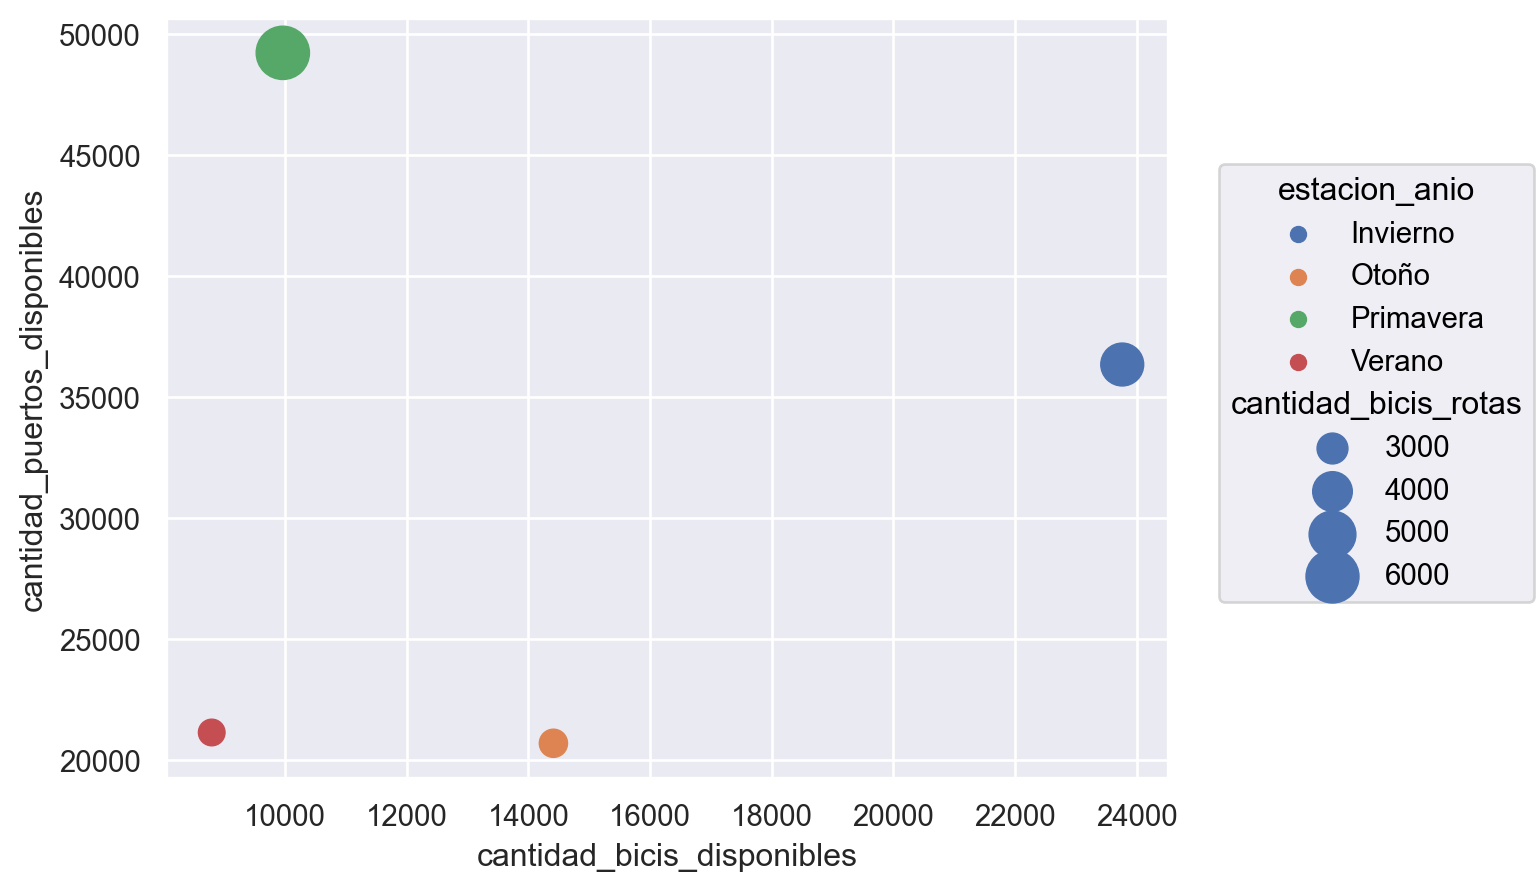

In [36]:
datos_resumidos = datos_eda_agrupados.groupby("estacion_anio", as_index=False).agg({
    "cantidad_bicis_disponibles": "sum",
    "cantidad_puertos_disponibles": "sum",
    "cantidad_bicis_rotas": "sum"})

(
    so.Plot(
        data=datos_resumidos, 
        x="cantidad_bicis_disponibles", 
        y="cantidad_puertos_disponibles", 
        color="estacion_anio",
        pointsize="cantidad_bicis_rotas"
    )
    .add(so.Dot())
    .scale(pointsize=(10, 20))
)

In [37]:
resumen_de_proporciones

,proporcion_bicis_sobre_espacio_total,proporcion_bicis_rotas_sobre_bicis_totales
estacion_anio,,
Invierno,0.368300,0.226636
Otoño,0.380355,0.185740
Primavera,0.152664,0.479157
Verano,0.270157,0.334423


### Conclusiones 10: 

Podemos observar cómo el clima y la intensidad de uso afectan directamente el desgaste físico de las unidades y la disponibilidad de espacios. Hay un pico de actividad en la primavera , donde la cantidad de bicis disponibles es bastante baja y, en contraposición, hay una alta disponibilidad de puertos ; agregando también que es la temporada con más unidades fuera de servicio por roturas , se podría inferir que esto se debe al alto uso. En verano hay una baja cantidad de bicicletas y puertos disponibles simultáneamente , además de que un tercio de las bicicletas están rotas ; considerando la temporalidad, se podría interpretar esto como un efecto de arrastre del desgaste provocado en primavera. En cuanto al otoño, este presenta el índice de bicicletas dañadas más bajo y una cantidad de bicis funcionales más alta que en verano , lo que podría indicar una mayor presencia de unidades operativas listas para el uso en una cantidad de puertos similar. Finalmente, en invierno se observa una alta cantidad de bicis disponibles , lo cual indica poco uso , especialmente al ver que tiene una alta proporción de unidades ancladas en relación al espacio total.

## Ejercicio 11

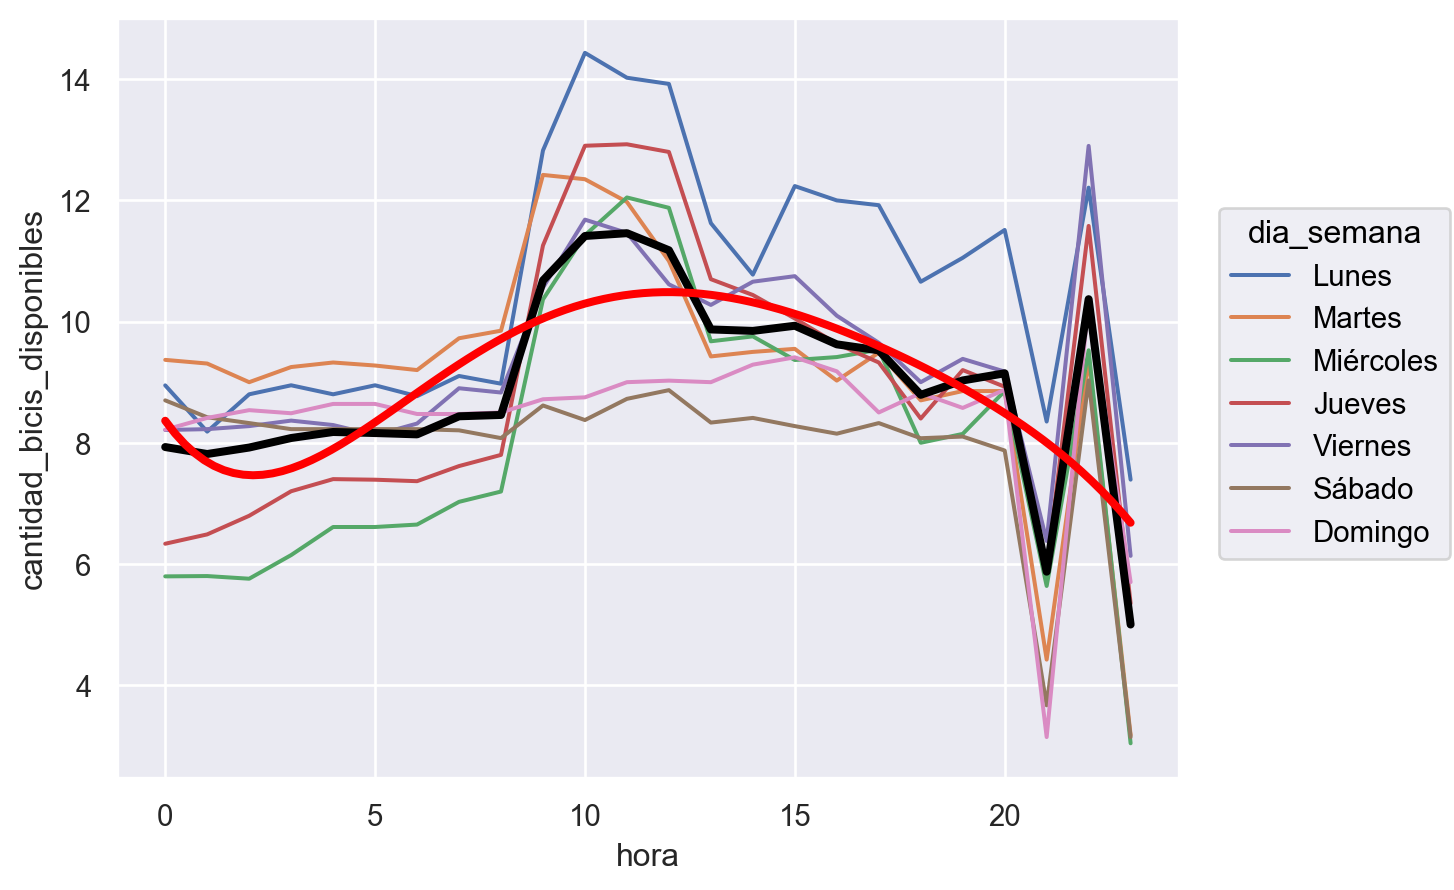

In [38]:
(
    so.Plot(datos_eda_agrupados, x="hora", y="cantidad_bicis_disponibles", color="dia_semana")
    .add(so.Line(), so.Agg("mean"))
    .add(so.Line(linewidth=3, color="black"), so.Agg("mean"), color=None) # línea de la media general
    .add(so.Line(linewidth=3, color="red"), so.PolyFit(5), color=None) # tendencia general con polinomio de grado 5
)

In [39]:
datos_eda_agrupados.groupby(["dia_semana","hora"])[["proporcion_bicis_sobre_espacio_total","proporcion_bicis_rotas_sobre_bicis_totales"]].mean()

proporcion_bicis_sobre_espacio_total  \
dia_semana hora                                         
Domingo    0                                 0.256757   
           1                                 0.262821   
           2                                 0.266827   
           3                                 0.265224   
           4                                 0.270032   
...                                               ...   
Viernes    19                                0.293269   
           20                                0.286719   
           21                                0.199353   
           22                                0.403125   
           23                                0.191667   

                 proporcion_bicis_rotas_sobre_bicis_totales  
dia_semana hora                                              
Domingo    0                                       0.362572  
           1                                       0.360063  
           2                                       0.350821  
           3                                       0.345731  
           4                                       0.342818  
...                                                     ...  
Viernes    19                                      0.339752  
           20                                      0.364003  
           21                                      0.460097  
           22                                      0.239167  
           23                                      0.457584  

[168 rows x 2 columns]

# Conclusiones 11:

Al analizar el flujo diario, podemos observar cómo el comportamiento de las estaciones varía según el día y la hora. En primer lugar, existe una clara distinción entre los días de semana y los fines de semana: mientras que de lunes a viernes se registran los picos más altos de disponibilidad en los anclajes (especialmente los lunes), los sábados y domingos muestran curvas mucho más planas y bajas, indicando un posible uso recreativo más pausado donde las bicicletas no regresan tan rápido a las estaciones. En segundo lugar, la tendencia horaria general (marcada por las líneas negra y roja) revela que las estaciones alcanzan su punto máximo de disponibilidad cerca del mediodía. Al ser un horario de permanencia en oficinas o aulas, podría ser una ventana de tiempo donde se retiran menos bicicletas de las que ya fueron entregadas. A partir de la tarde, se inicia un descenso gradual que ter,oma en una caída fuerte durante la noche, momento en el que la cantidad de bicicletas en las estaciones llega a su mínimo; esto refleja probablemente el último flujo masivo de viajes de regreso a zonas por fuera de estas estaciones.

## Ejercicio 12

### Pregunta conceptual a responder

# Análisis Exploratorio

In [40]:
import sqlite3
import requests

link_api_informacion = "https://apitransporte.buenosaires.gob.ar/ecobici/gbfs/stationInformation?"
credenciales = {
    "client_id": "f3429f52737b4e019607007f7454602f",
    "client_secret": "E09120C8BC17468fBd98Bd7F37173674"
}
response = requests.get(link_api_informacion, params=credenciales)
df_informacion = pd.DataFrame(response.json()["data"]["stations"])[["station_id", "lat", "lon", "capacity"]]

df_clima = pd.read_csv("clima.csv").rename(columns={ "date": "fecha" })
df_clima["fecha"] = pd.to_datetime(df_clima["fecha"])

conexion = sqlite3.connect(":memory:")
df_informacion.to_sql("estaciones", conexion, index=False, if_exists="replace")
datos_limpios.to_sql("datos", conexion, index=False, if_exists="replace")
df_clima.to_sql("clima", conexion, index=False, if_exists="replace")
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1,Otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14,Verano
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16,Verano


---
Se plantea la siguiente pregunta: _¿cuáles son las semanas con mayor uso de bicis?
¿corresponden con los inicios de los cuatrimestres de la FCEyN / FADU / CBC?_

Primero, se crea una tabla `calendario` la cual posee las fechas de inicio
y fin de cada instancia del año académico.

In [41]:
conexion.executescript("""
DROP TABLE IF EXISTS calendario;
CREATE TABLE calendario (
    instancia TEXT NON NULL,
    inicio    TEXT NON NULL,
    fin       TEXT NON NULL
);

INSERT INTO calendario(instancia, inicio, fin) VALUES
("Curso de Verano",        "2025-01-27", "2025-03-15"),
("Primer Cuatrimestre",    "2025-03-17", "2025-07-05"),
("Vacaciones de Invierno", "2025-07-06", "2025-08-17"),
("Segundo Cuatrimestre",   "2025-08-18", "2025-12-06"),
("Vacaciones de Verano",   "2025-12-07", "2026-01-25"),
("Curso de Verano",        "2026-01-26", "2026-03-14");
""")

Ahora, para cada semana del año, se calcula el promedio de bicis que se encuentran
en uso; a este promedio se le adjunta el número de semana y en qué momento del
año académico se está. Estos datos se colocan dentro del DataFrame `df_media_semanal`,
y se genera un gráfico de líneas que muestra la relación entre el promedio de ocupación
y la semana en cuestión, separados por momento académico.

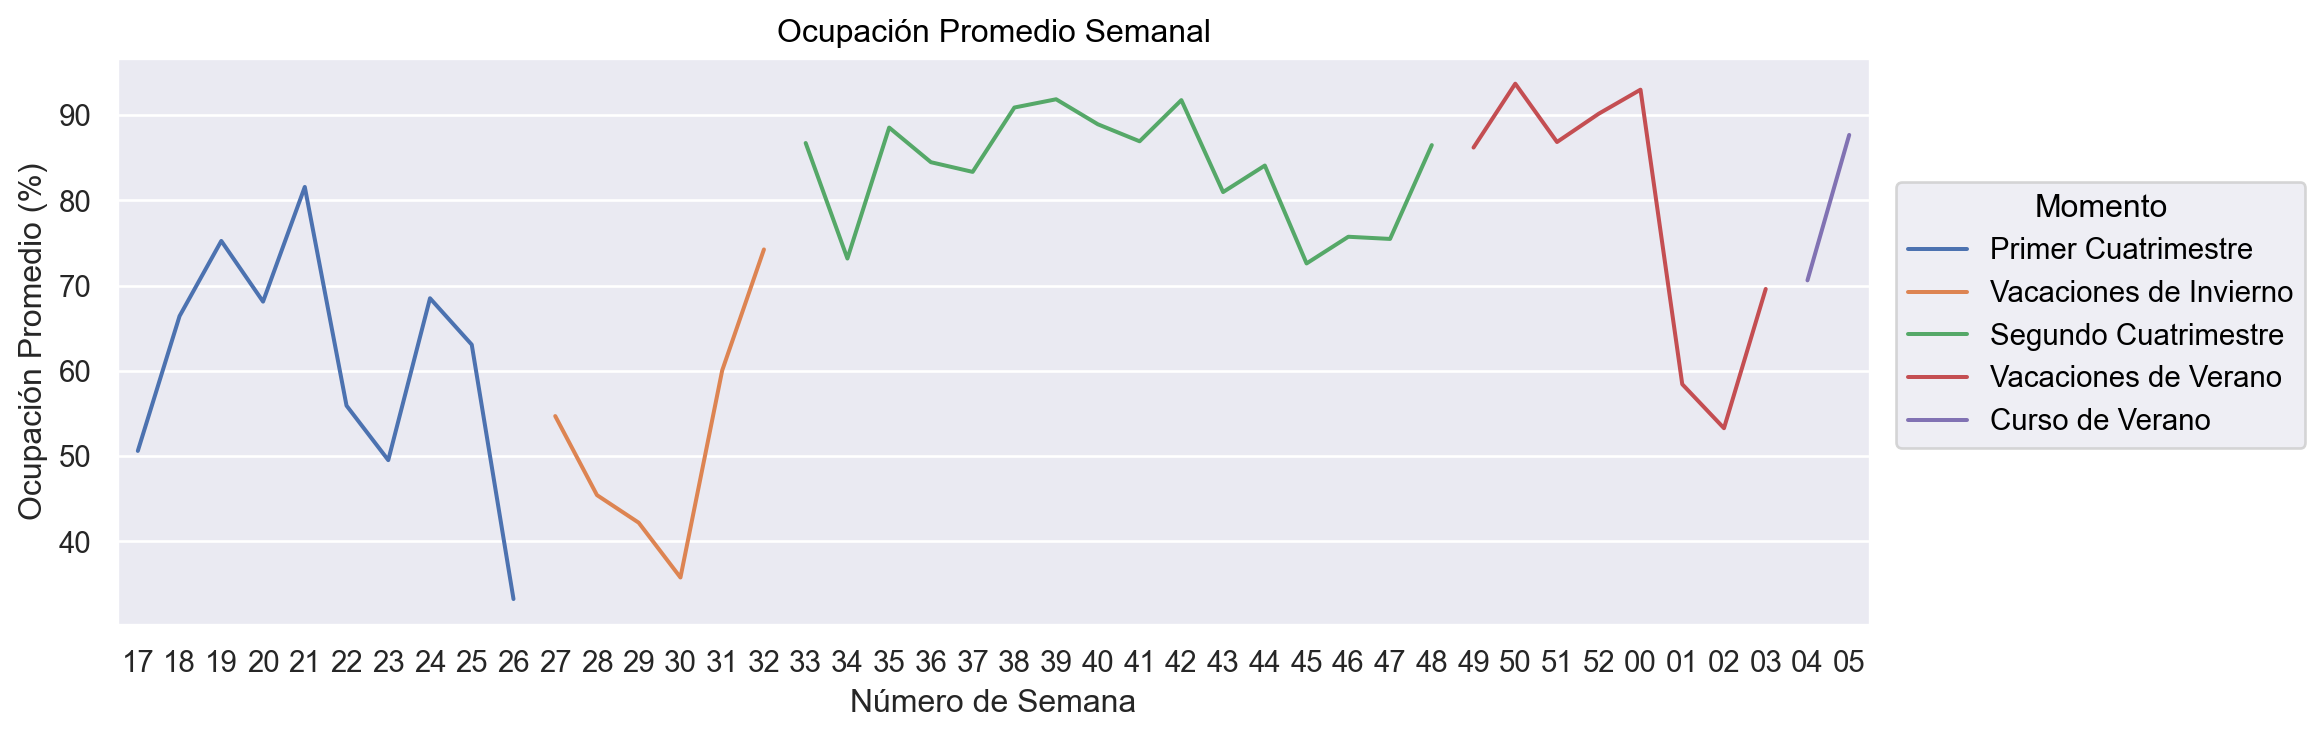

In [42]:
df_media_semanal = pd.read_sql_query("""
SELECT
    STRFTIME('%W', d.fecha) AS semana,
    c.instancia,
    AVG(100.0 - (100.0 * d.bicis_disponibles / (1.0 * e.capacity))) AS ocupacion_promedio
FROM datos d
INNER JOIN calendario c ON DATE(d.fecha) BETWEEN c.inicio AND c.fin
INNER JOIN estaciones e ON e.station_id = d.estacion
GROUP BY STRFTIME('%W-%Y', d.fecha)
ORDER BY d.fecha;
""", conexion)

(
  so.Plot(data=df_media_semanal, x="semana", y="ocupacion_promedio", color="instancia")
    .add(so.Line())
    .layout(size=(10, 4))
    .label(
        title="Ocupación Promedio Semanal",
        color="Momento",
        x="Número de Semana",
        y="Ocupación Promedio (%)"
    )
)

A simple vista del gráfico se puede ver que existe una diferencia marcada entre el uso de bicicletas
en vacaciones de invierno y de verano. Uno esperaría que en vacaciones de verano el uso promedio baje,
de una forma similar que en invierno. Esto podría sugerir que existe otro factor que influencia en el
uso de las bicicletas, es decir, no son usadas únicamente por estudiantes. A continuación se realiza el
mismo gráfico, pero excluyendo ambos intervalos vacacionales, e incluyendo líneas de tendencia.

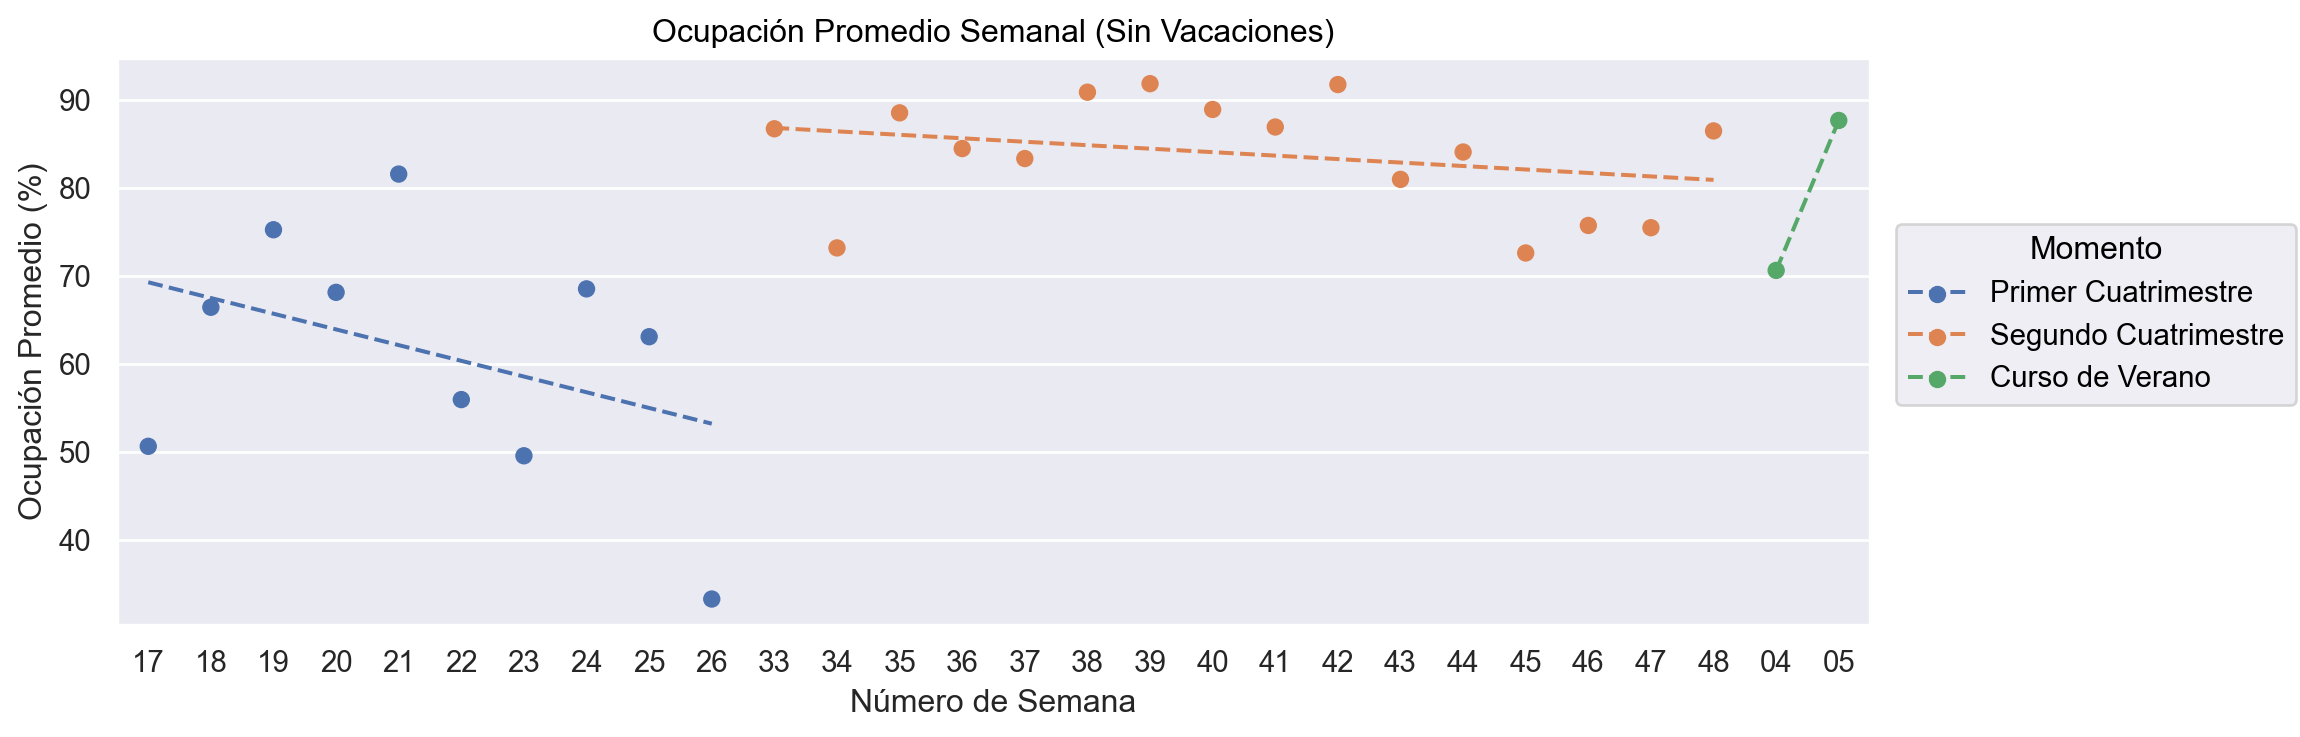

In [43]:
(
  so.Plot(
        data=df_media_semanal[df_media_semanal["instancia"].isin(["Vacaciones de Invierno", "Vacaciones de Verano"]) == False],
        x="semana",
        y="ocupacion_promedio",
        color="instancia"
    )
    .add(so.Dot())
    .add(so.Line(linestyle="--"), so.PolyFit(1))
    .layout(size=(10, 4))
    .label(
        title="Ocupación Promedio Semanal (Sin Vacaciones)",
        color="Momento",
        x="Número de Semana",
        y="Ocupación Promedio (%)"
    )
)

Teniendo este gráfico, se puede ver que las pendientes son negativas para el primer y segundo cuatrimestre. Esto sugiere
que el uso promedio comienza alto y luego, a medida que pasa el cuatrimestre, va bajando. El caso de la recta del
curso de verano también parece compartir esta tendencia, aunque como son pocos puntos no se puede garantizar que cumpla
con la misma tendencia.

En cualquier caso, se puede ver que las semanas con mayor uso de bicicletas suelen ser las primeras de cada cuatrimestre,
aunque la forma de cada curva sugiere la existencia de otros factores que influencian el uso.

---

Esto último motiva la siguiente pregunta: _¿existe alguna relación entre el uso de bicicletas y la estación del año?_
Uno esperaría que sí, ya que es más problable que alguien vaya en bicicleta cuando hace calor que cuando hace frío. Sin embargo,
con la intuición no es suficiente, así que se va realizar un gráfico que muestre la existencia de dicha relación.

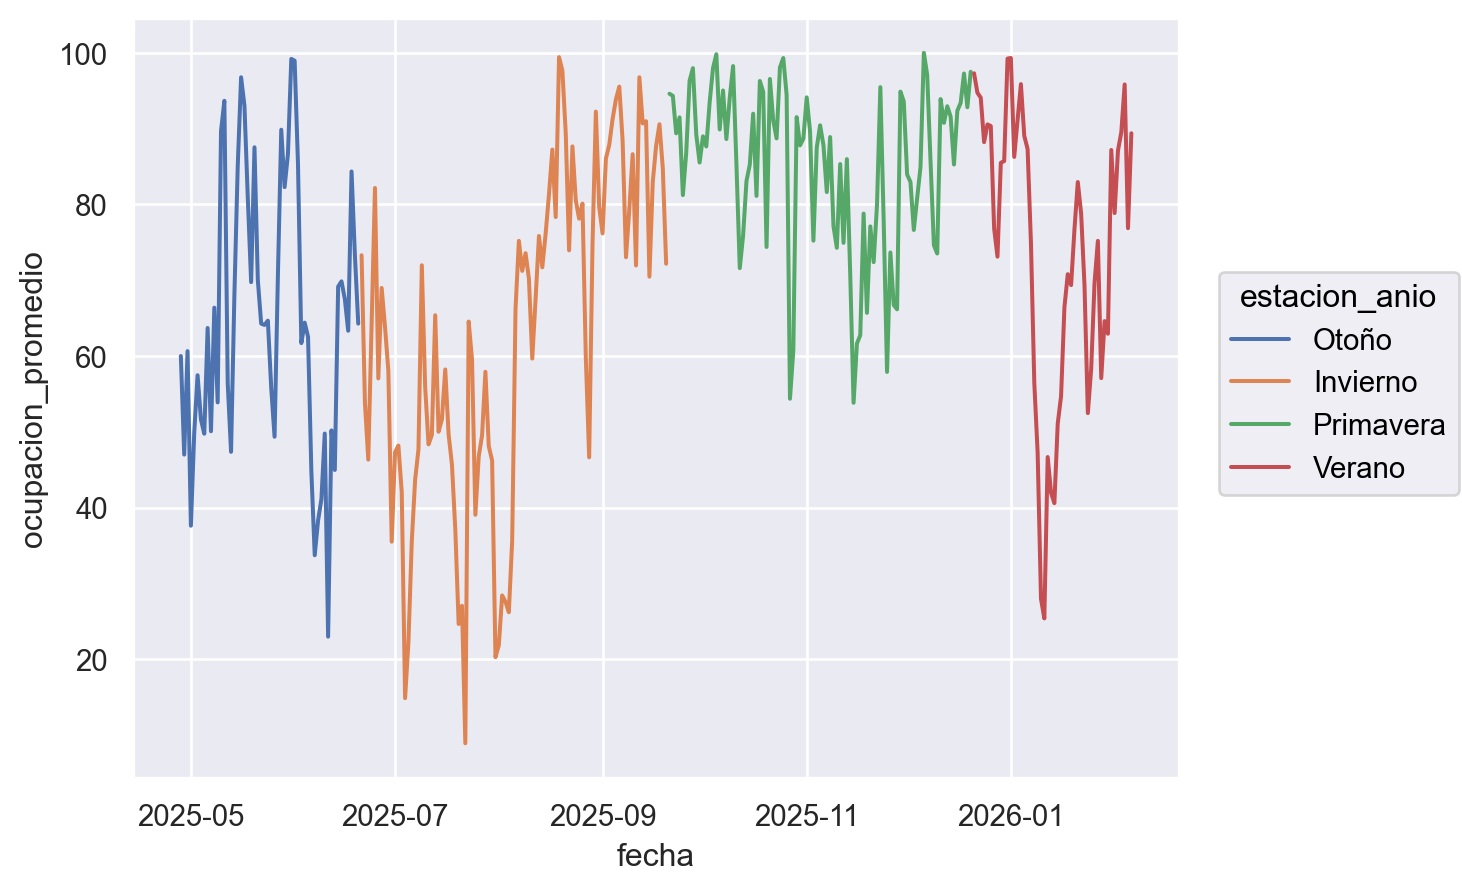

In [44]:
df_media_estacional = pd.read_sql_query("""
SELECT 
    d.fecha,
    d.estacion_anio,
    AVG(100.0 - (100.0 * d.bicis_disponibles / (1.0 * e.capacity))) AS ocupacion_promedio
FROM datos d
INNER JOIN estaciones e ON e.station_id = d.estacion
GROUP BY d.fecha
""", conexion)
df_media_estacional["fecha"] = pd.to_datetime(df_media_estacional["fecha"])

so.Plot(data=df_media_estacional, x="fecha", y="ocupacion_promedio", color="estacion_anio").add(so.Line())
#sns.boxplot(data=df_media_estacional, x="ocupacion_promedio", y="estacion_anio")

¿Agregar conclusión parcial de este gráfico?

In [45]:
import pandas as pd

# 1. LIMPIEZA INICIAL: Borramos cualquier rastro previo para evitar conflictos de nombres
conexion.execute("DROP TABLE IF EXISTS rangos_temp_temporadas;")
conexion.execute("DROP VIEW IF EXISTS datos_compuestos;")

# 2. CÁLCULO EN PANDAS: Obtenemos los datos para calcular los cuartiles
# Extraemos tavg y temporada para procesarlos con Python
df_clima_estaciones = pd.read_sql_query("""
    SELECT c.tavg, d.estacion_anio AS temporada 
    FROM clima c 
    INNER JOIN datos d ON d.fecha = c.fecha
""", conexion)

# Puesto que decir que hace "mucho frío" y "mucho calor" es bastante arbritrario, ya que depende de cada persona,
# lo que se puede hacer es agrupar por estación y para cada una calcular los cuartiles 0.25 y 0.75. De esta
# forma se puede determinar que hace "mucho frío" si la temperatura media es menor al cuartil 0.25 y que hace
# "mucho calor" si es mayor al cuartil 0.75, para cada estación. Pero, ¿por qué se separa en estaciones? La idea
# es que 25 °C en verano es un día "normal", mientras que en invierno es un día caluroso.
# Para esto se crea una vista de SQL, junto con su respectivo DataFrame, en donde se almacean dichos cuartiles
# para cada estación.

# AQUÍ ESTÁ EL TRUCO: Usamos .quantile() de Pandas porque SQLite no sabe qué es un cuantil.
df_rangos_temp_temporadas = df_clima_estaciones.groupby('temporada')['tavg'].quantile([0.25, 0.75]).unstack()
df_rangos_temp_temporadas.columns = ['t_min', 't_max']
df_rangos_temp_temporadas = df_rangos_temp_temporadas.reset_index()

# Inyectamos el resultado de vuelta a la DB como una TABLA para que tus JOINs funcionen
df_rangos_temp_temporadas.to_sql('rangos_temp_temporadas', conexion, if_exists='replace', index=False)

display(df_rangos_temp_temporadas)

# Una vez obtenidos los rangos de temperatura por temporada, se genera un nuevo conjunto de datos agregando
# los datos del DataFrame "datos_limpios", junto con los climatológicos y la categorización de "mucho frío" y
# "mucho calor". La idea es poder tener todos estos datos juntos, en vez de tener que hacer esto mismo cada
# vez que se quieran analizar las relaciones.

conexion.executescript("""
CREATE VIEW datos_compuestos AS
SELECT 
    d.fecha,               d.dia_semana,
    d.estacion,            d.bicis_disponibles,
    d.bicis_rotas,         d.puertos_disponibles,
    d.puertos_rotos,
    d.estacion_anio AS temporada,
    e.capacity      AS capacidad,
    c.tavg          AS temp_media,
    c.prcp          AS precipitaciones,
    (
        CASE WHEN c.tavg < rtt.t_min THEN 'Mucho Frio'
             WHEN c.tavg > rtt.t_max THEN 'Mucho Calor'
             ELSE 'Normal'
        END
    ) AS valoracion_temp,
    (
        CASE WHEN c.prcp = 0 THEN 'Sin Lluvia'
             ELSE 'Con Lluvia'
        END
    ) AS valoracion_prec
FROM datos d
INNER JOIN clima c ON c.fecha = d.fecha
INNER JOIN estaciones e ON e.station_id = d.estacion
INNER JOIN rangos_temp_temporadas rtt ON rtt.temporada = d.estacion_anio;
""")

df_datos_compuetos = pd.read_sql_query("""
SELECT * FROM datos_compuestos;
""", conexion)
display(df_datos_compuetos.head())

#

df_medias = pd.read_sql_query("""
SELECT
    dc.fecha,
    dc.temporada,
    dc.dia_semana,
    AVG(100.0 - (dc.bicis_disponibles * 100.0 / dc.capacidad)) AS ocupacion_media,

    AVG(dc.temp_media) AS temp_media,
    dc.valoracion_temp,

    AVG(dc.precipitaciones) AS precipitaciones_media,
    dc.valoracion_prec
FROM datos_compuestos dc
GROUP BY dc.fecha;
""", conexion)
df_medias["fecha"] = pd.to_datetime(df_medias["fecha"])
display(df_medias.head())

,temporada,t_min,t_max
0,Invierno,10.6,14.7
1,Otoño,12.2,18.1
2,Primavera,16.8,22.2
3,Verano,24.8,29.2


,fecha,dia_semana,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,temporada,capacidad,temp_media,precipitaciones,valoracion_temp,valoracion_prec
0,2025-05-12 00:00:00,Lunes,420,0,0,12,0,Otoño,12,16.8,0.0,Normal,Sin Lluvia
1,2025-05-12 00:00:00,Lunes,420,0,0,12,0,Otoño,12,16.8,0.0,Normal,Sin Lluvia
2,2025-05-12 00:00:00,Lunes,420,0,0,12,0,Otoño,12,16.8,0.0,Normal,Sin Lluvia
3,2025-05-13 00:00:00,Martes,420,0,0,12,0,Otoño,12,18.0,0.0,Normal,Sin Lluvia
4,2025-05-13 00:00:00,Martes,420,0,0,12,0,Otoño,12,18.0,0.0,Normal,Sin Lluvia


,fecha,temporada,dia_semana,ocupacion_media,temp_media,valoracion_temp,precipitaciones_media,valoracion_prec
0,2025-04-28,Otoño,Lunes,60.000000,16.9,Normal,0.0,Sin Lluvia
1,2025-04-29,Otoño,Martes,46.992754,16.6,Normal,0.0,Sin Lluvia
2,2025-04-30,Otoño,Miércoles,60.643939,18.0,Normal,0.0,Sin Lluvia
3,2025-05-01,Otoño,Jueves,37.608696,18.2,Mucho Calor,0.0,Sin Lluvia
4,2025-05-02,Otoño,Viernes,49.891304,19.0,Mucho Calor,0.0,Sin Lluvia


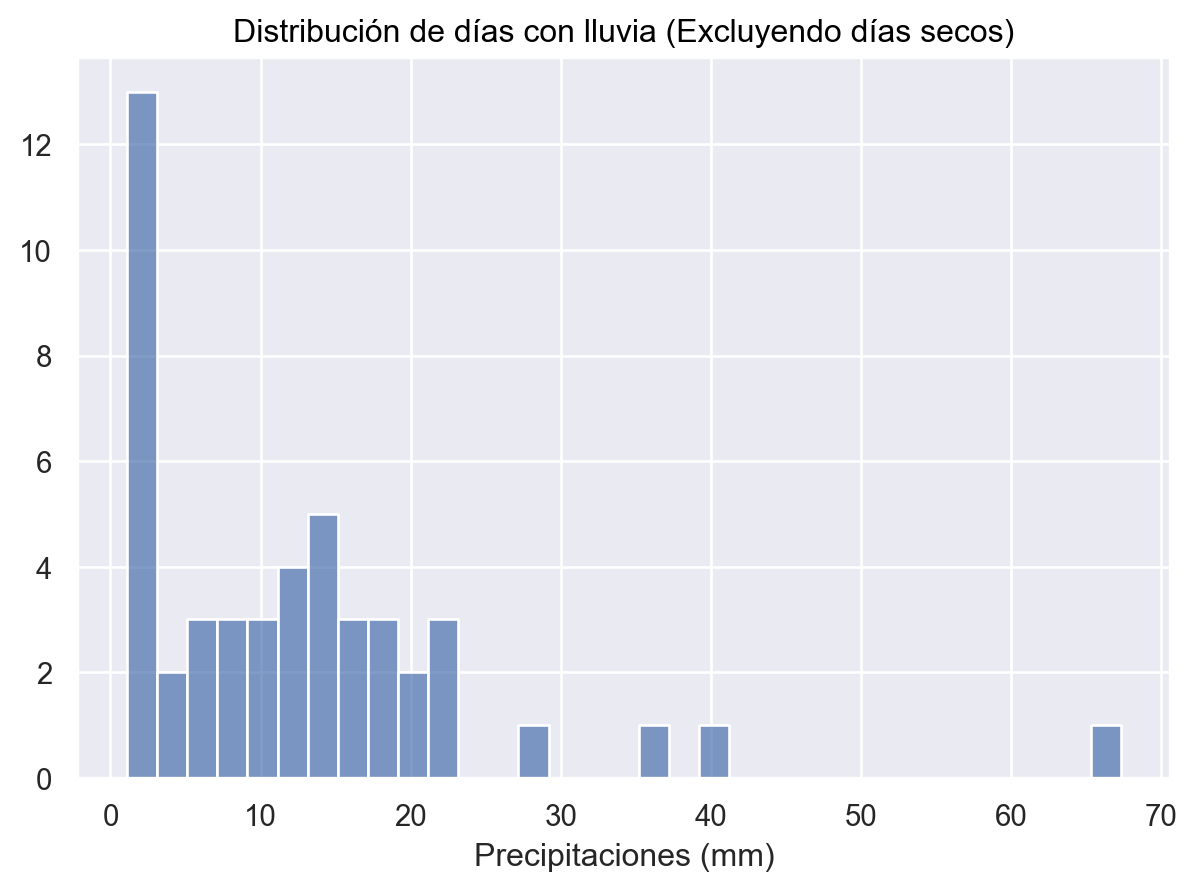

In [46]:
# Filtramos solo días con lluvia > 0
df_lluvia = df_medias[df_medias["precipitaciones_media"] > 1]

(
    so.Plot(df_lluvia, x="precipitaciones_media")
    .add(so.Bars(), so.Hist(binwidth=2)) # Ajustamos el ancho de barra para ver mejor
    .label(title="Distribución de días con lluvia (Excluyendo días secos)", x="Precipitaciones (mm)")
)

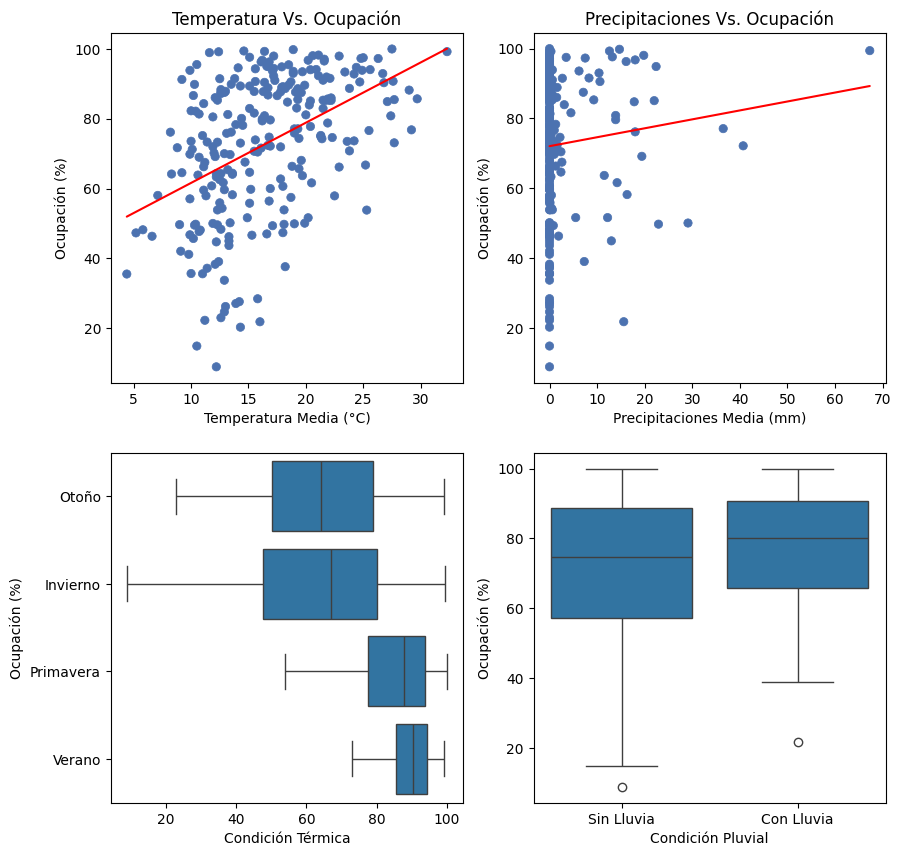

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# 
so.Plot(data=df_medias, x="temp_media", y="ocupacion_media") \
  .add(so.Dot()) \
  .add(so.Line(color="red"), so.PolyFit(1)) \
  .label(title="Temperatura Vs. Ocupación", x="Temperatura Media (°C)", y="Ocupación (%)") \
  .on(ax[0][0]).plot()

# 
so.Plot(data=df_medias, x="precipitaciones_media", y="ocupacion_media") \
  .add(so.Dot()) \
  .add(so.Line(color="red"), so.PolyFit(1)) \
  .label(title="Precipitaciones Vs. Ocupación", x="Precipitaciones Media (mm)", y="Ocupación (%)") \
  .on(ax[0][1]).plot()

# 
sns.boxplot(
    data=df_medias,
    x="ocupacion_media",
    y="temporada",
    ax=ax[1][0]
)
ax[1][0].set_xlabel("Condición Térmica")
ax[1][0].set_ylabel("Ocupación (%)")

# 
sns.boxplot(
    data=df_medias,
    x="valoracion_prec",
    y="ocupacion_media",
    order=["Sin Lluvia", "Con Lluvia"],
    ax=ax[1][1]
)
ax[1][1].set_xlabel("Condición Pluvial")
ax[1][1].set_ylabel("Ocupación (%)")

plt.show()

Como hay un punto solitario cerca de los 70mm con ocupación alta, ese solo punto está "tirando" de la cuerda de la regresión hacia arriba. En realidad, no hay correlación real entre los mm de lluvia y la ocupación, sino que la ocupación se mantiene alta a pesar de la lluvia.

## Consideración adicional: ¿deberíamos dividir más específicamente las precipitaciones? Es decir Sin Lluvia / Poca Lluvia / Mucha Lluvia, definiendolo bajo un umbral establecido arbitrariamente entre mucho y poco

# Agregar conclusión final de EDA

A + temperatura, + uso
Verano y primavera fuertes
La lluvia pareciera no incidir pero conviene subdividir "Con lluvia" en rangos de "poco"/"mucho" para ver algo más

## Consideraciones respecto a precipitaciones frente a ocupación, ¿saco el outlier? ¿aplico escala logarítmica (no pareciera ser un problema de ese estilo, sino un tema de acumulación en el cero)? ¿uso una curva?

In [48]:
Q1 = df_medias['precipitaciones_media'].quantile(0.25)
Q3 = df_medias['precipitaciones_media'].quantile(0.75)

IQR = Q3 - Q1

print(f"Primer Cuartil (Q1): {Q1}")
print(f"Tercer Cuartil (Q3): {Q3}")
print(f"Rango Intercuartílico (IQR): {IQR}")

limite_superior = Q3 + 1.5 * IQR #1.0, deja DEMASIADOS datos afuera


Primer Cuartil (Q1): 0.0
Tercer Cuartil (Q3): 0.4
Rango Intercuartílico (IQR): 0.4


# Regresión Lineal [15-16-17-18]

Regresi´on Lineal [2 pts.]

En esta secci´on, queremos analizar el uso de bicis en otras estaciones de la Ciudad. Para eso vamosa utilizar el dataset viajes-por-dia.csv con la cantidad de viajes por hora realizados desde cadaestaci´on y cantidad de viajes por hora realizados hacia cada estaci´on.

15. Se quiere ajustar la cantidad de viajes con origen en la estaci´on 005- Plaza Italia en funci´on de
viajes originados en otras estaciones o con destino en distintas estaciones. Es decir, queremos
hacer un modelo para ajustar la variable origen_5 en funci´on de otras variables del DataFrame.

16. Propongan tres modelos de regresi´on distintos. En cada modelo, pueden utilizarse a lo sumo 5
variables explicativas (pueden ser variables distintas en los distintos modelos). Los criterios de
selecci´on de esas 5 columnas los determinan ustedes arbitrariamente, y deben estar explicitados
en el informe.

17. Propongan un esquema de validaci´on de los modelos y utilizarlo para seleccionar el mejor de
los tres modelos propuestos.
Importante: Pueden utilizar cualquier criterios para la elecci´on de las variables de cada
modelo, no se pide buscar las 5 mejores variables entre todas las disponibles. Lo que s´ı tienen
que hacer es explicar entre los 3 modelos que proponen c´omo seleccionan el mejor de ellos.

18. Para el modelo elegido, indiquen la f´ormula final de modelo.

In [49]:
viajes_por_dia = pd.read_csv("viajes_diarios.csv")
viajes_por_dia

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_567,destino_568,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,0,0
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,0,0
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,0,0
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,25,41,72,103,40,19,81,62,36,...,17,25,31,20,15,11,27,5,33,18
362,2024-12-28,16,19,26,33,10,4,21,23,23,...,8,19,25,29,1,2,5,3,33,6
363,2024-12-29,15,17,15,83,12,8,38,35,26,...,12,23,23,27,7,4,1,1,17,9
364,2024-12-30,26,62,55,123,58,12,96,63,39,...,15,21,47,24,7,4,9,10,34,15


In [50]:
viajes_por_dia["fecha"] = pd.to_datetime(viajes_por_dia["fecha"])

In [51]:
# Reutilizamos la función determinar_estacion_anio

viajes_por_dia['estacion_anio'] = viajes_por_dia.apply(determinar_estacion_anio, axis=1)

In [52]:
viajes_por_dia

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_568,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577,estacion_anio
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,0,Verano
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,0,Verano
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,0,Verano
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,0,Verano
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,0,Verano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,25,41,72,103,40,19,81,62,36,...,25,31,20,15,11,27,5,33,18,Verano
362,2024-12-28,16,19,26,33,10,4,21,23,23,...,19,25,29,1,2,5,3,33,6,Verano
363,2024-12-29,15,17,15,83,12,8,38,35,26,...,23,23,27,7,4,1,1,17,9,Verano
364,2024-12-30,26,62,55,123,58,12,96,63,39,...,21,47,24,7,4,9,10,34,15,Verano


In [53]:

dias_en_español = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

viajes_por_dia['dia_semana'] = viajes_por_dia['fecha'].dt.dayofweek.map(dias_en_español)

In [54]:
viajes_por_dia[["fecha","estacion_anio","dia_semana"]]

,fecha,estacion_anio,dia_semana
0,2024-01-01,Verano,Lunes
1,2024-01-02,Verano,Martes
2,2024-01-03,Verano,Miércoles
3,2024-01-04,Verano,Jueves
4,2024-01-05,Verano,Viernes
...,...,...,...
361,2024-12-27,Verano,Viernes
362,2024-12-28,Verano,Sábado
363,2024-12-29,Verano,Domingo
364,2024-12-30,Verano,Lunes


In [55]:
viajes_por_dia

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577,estacion_anio,dia_semana
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,Verano,Lunes
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,Verano,Martes
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,Verano,Miércoles
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,Verano,Jueves
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,Verano,Viernes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,25,41,72,103,40,19,81,62,36,...,31,20,15,11,27,5,33,18,Verano,Viernes
362,2024-12-28,16,19,26,33,10,4,21,23,23,...,25,29,1,2,5,3,33,6,Verano,Sábado
363,2024-12-29,15,17,15,83,12,8,38,35,26,...,23,27,7,4,1,1,17,9,Verano,Domingo
364,2024-12-30,26,62,55,123,58,12,96,63,39,...,47,24,7,4,9,10,34,15,Verano,Lunes


## 1. estacion_ anio - LISTO

## 2. dia_semana - LISTO

## 3. Clases si/no, generar columna de "época de cursada" y lógica condicional combinada con dia_semana para establecer Si/No hubo clases

## 4. Estaciones cercanas por latitud y longitud, ¿cómo? Dataset de info de cada estación, pero ¿dónde está? → Cantidad de viajes por destino → df_informacion (lat y lon, determinar que es cercanía, y capacidad de esas cercanas)

## 5. Clima (descargar de Meteosat en 2024 en Palermo y usar temperatura y precipitaciones_etiquetadas) → df_clima (tmp_avg transformada a etiquetas ordinales y prcp tmb debería)

¿Hora del día extraída con un groupby de día-hora del dataset de EDA? Considerar día de la semana Y época del año

Además, ¿como combinamos la lógica de bicis y puertos disponibles con viajes diarios?

In [56]:
datos_eda_agrupados

,fecha,hora,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles,dia_semana,dia,mes,anio,estacion_anio,cantidad_total_de_espacio,proporcion_bicis_sobre_espacio_total,proporcion_bicis_rotas_sobre_bicis_totales
0,2025-04-28,23,14,3,15,Lunes,28,4,2025,Otoño,32,0.43750,0.176471
1,2025-04-29,0,16,3,13,Martes,29,4,2025,Otoño,32,0.50000,0.157895
2,2025-04-29,1,16,3,13,Martes,29,4,2025,Otoño,32,0.50000,0.157895
3,2025-04-29,2,16,3,13,Martes,29,4,2025,Otoño,32,0.50000,0.157895
4,2025-04-29,3,16,3,13,Martes,29,4,2025,Otoño,32,0.50000,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,2026-02-06,11,3,3,26,Viernes,6,2,2026,Verano,32,0.09375,0.500000
6260,2026-02-06,12,4,3,25,Viernes,6,2,2026,Verano,32,0.12500,0.428571
6261,2026-02-06,14,4,3,25,Viernes,6,2,2026,Verano,32,0.12500,0.428571
6262,2026-02-06,15,4,3,25,Viernes,6,2,2026,Verano,32,0.12500,0.428571


""""
    import os

# Definimos la ruta usando os.path.join para evitar problemas de barras
ruta_carpeta = r"C:\Users\Usuario\OneDrive\Escritorio\TP 1 - Labo"
nombre_archivo = "info_estaciones.xlsx"
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

# Exportamos usando la ruta construida
df_informacion.to_excel(ruta_completa)
"""

import seaborn.objects as so

# Separar la estación 5 del resto
df_otras = df_informacion[df_informacion['station_id'] != 5]
df_est5 = df_informacion[df_informacion["station_id"] == 5]

# Gráfico con dos capas
(
    so.Plot()
    #.add(so.Dot(alpha=0.6, color='blue'), data=df_otras, x='lon', y='lat')
    .add(so.Dot(alpha=1, color='red', pointsize=10), data=df_est5, x='lon', y='lat')
    .label(x='Longitud', y='Latitud', title='Ubicación de Estaciones de Bicicletas en Buenos Aires')
    .limit(x=(-58.55, -58.35), y=(-34.68, -34.54))
    .theme({**so.Plot.config.theme, 'axes.grid': True})
)

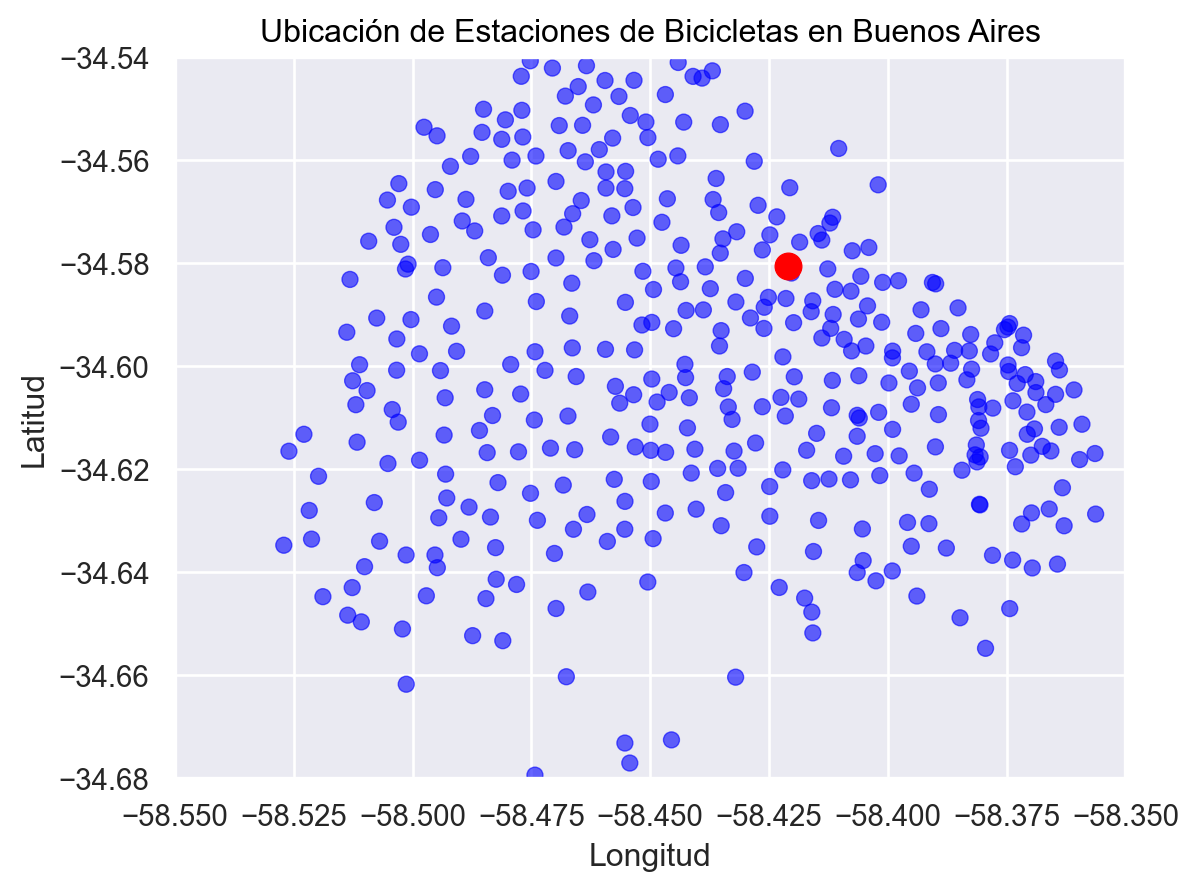

In [57]:
import seaborn.objects as so

# 1) Crear la columna es_estacion_5
df_informacion['es_estacion_5'] = df_informacion['station_id'] == '5'

# 2) Separar la estación 5 del resto para el gráfico
df_otras = df_informacion[df_informacion['station_id'] != '5']
df_est5 = df_informacion[df_informacion['station_id'] == '5']

# 3) Gráfico con dos capas diferenciando la estación 5
(
    so.Plot()
    .add(so.Dot(alpha=0.6, color='blue'), data=df_otras, x='lon', y='lat')
    .add(so.Dot(alpha=1, color='red', pointsize=10), data=df_est5, x='lon', y='lat')
    .label(x='Longitud', y='Latitud', title='Ubicación de Estaciones de Bicicletas en Buenos Aires')
    .limit(x=(-58.55, -58.35), y=(-34.68, -34.54))
    .theme({**so.Plot.config.theme, 'axes.grid': True})
)

In [58]:
import numpy as np

# Función de Haversine para calcular distancia entre dos puntos geográficos
def haversine(lat1, lon1, lat2, lon2):
    """
    Calcula la distancia en kilómetros entre dos puntos geográficos
    usando la fórmula de Haversine
    """
    # Radio de la Tierra en kilómetros
    R = 6371.0
    
    # Convertir grados a radianes
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    # Diferencias
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Fórmula de Haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Distancia en kilómetros
    distancia = R * c
    
    return distancia

# Obtener las coordenadas de la estación 5
estacion_5 = df_informacion[df_informacion['station_id'] == '5'].iloc[0]
lat_5 = estacion_5['lat']
lon_5 = estacion_5['lon']

# Calcular la distancia de cada estación a la estación 5 (en kilómetros)
df_informacion['distancia_a_est5_km'] = haversine(
    df_informacion['lat'], 
    df_informacion['lon'], 
    lat_5, 
    lon_5
)

# Crear un puntaje de cercanía (inverso a la distancia)
# Mientras más cerca, mayor puntaje (0-100)
max_distancia = df_informacion['distancia_a_est5_km'].max()
df_informacion['puntaje_cercania_est5'] = 100 * (1 - df_informacion['distancia_a_est5_km'] / max_distancia)

# Verificar resultados
print(df_informacion[['station_id', 'distancia_a_est5_km', 'puntaje_cercania_est5']].head(10))
print(f"\nEstación 5 (debería tener distancia 0 y puntaje 100):")
print(df_informacion[df_informacion['station_id'] == '5'][['station_id', 'distancia_a_est5_km', 'puntaje_cercania_est5']])

  station_id  distancia_a_est5_km  puntaje_cercania_est5
0          2             4.434498              65.658690
1          3             5.907115              54.254556
2          4             5.383199              58.311831
3          5             0.000000             100.000000
4          6             7.100328              45.014169
5          7             4.651335              63.979481
6          8             4.322352              66.527165
7          9             1.326374              89.728393
8         12             3.238620              74.919720
9         13             3.558527              72.442322

Estación 5 (debería tener distancia 0 y puntaje 100):
  station_id  distancia_a_est5_km  puntaje_cercania_est5
3          5                  0.0                  100.0


In [59]:
df_informacion

,station_id,lat,lon,capacity,es_estacion_5,distancia_a_est5_km,puntaje_cercania_est5
0,2,-34.592424,-58.374710,40,False,4.434498,65.658690
1,3,-34.612207,-58.369129,28,False,5.907115,54.254556
2,4,-34.603008,-58.368856,20,False,5.383199,58.311831
3,5,-34.580550,-58.420954,42,True,0.000000,100.000000
4,6,-34.628526,-58.369758,20,False,7.100328,45.014169
...,...,...,...,...,...,...,...
391,591,-34.604763,-58.509574,16,False,8.547104,33.810155
392,593,-34.648905,-58.384794,16,False,8.289864,35.802254
393,594,-34.544041,-58.439077,20,False,4.385658,66.036914
394,596,-34.654838,-58.379427,12,False,9.092709,29.584917


In [60]:
# Crear etiquetas de cercanía basadas en tercios (0-33, 33-66, 66-100)
def etiquetar_cercania(puntaje):
    if puntaje >= 66.67:
        return 'Cerca'
    elif puntaje >= 33.33:
        return 'Media'
    else:
        return 'Lejos'

# Aplicar la función a cada fila
df_informacion['etiqueta_cercania'] = df_informacion['puntaje_cercania_est5'].apply(etiquetar_cercania)

# Verificar la distribución
print(df_informacion['etiqueta_cercania'].value_counts())
print("\nEjemplos:")
print(df_informacion[['station_id', 'puntaje_cercania_est5', 'etiqueta_cercania']].head(10))
print(f"\nEstación 5:")
print(df_informacion[df_informacion['station_id'] == '5'][['station_id', 'puntaje_cercania_est5', 'etiqueta_cercania']])

etiqueta_cercania
Media    215
Cerca    141
Lejos     40
Name: count, dtype: int64

Ejemplos:
  station_id  puntaje_cercania_est5 etiqueta_cercania
0          2              65.658690             Media
1          3              54.254556             Media
2          4              58.311831             Media
3          5             100.000000             Cerca
4          6              45.014169             Media
5          7              63.979481             Media
6          8              66.527165             Media
7          9              89.728393             Cerca
8         12              74.919720             Cerca
9         13              72.442322             Cerca

Estación 5:
  station_id  puntaje_cercania_est5 etiqueta_cercania
3          5                  100.0             Cerca


In [61]:
df_informacion

,station_id,lat,lon,capacity,es_estacion_5,distancia_a_est5_km,puntaje_cercania_est5,etiqueta_cercania
0,2,-34.592424,-58.374710,40,False,4.434498,65.658690,Media
1,3,-34.612207,-58.369129,28,False,5.907115,54.254556,Media
2,4,-34.603008,-58.368856,20,False,5.383199,58.311831,Media
3,5,-34.580550,-58.420954,42,True,0.000000,100.000000,Cerca
4,6,-34.628526,-58.369758,20,False,7.100328,45.014169,Media
...,...,...,...,...,...,...,...,...
391,591,-34.604763,-58.509574,16,False,8.547104,33.810155,Media
392,593,-34.648905,-58.384794,16,False,8.289864,35.802254,Media
393,594,-34.544041,-58.439077,20,False,4.385658,66.036914,Media
394,596,-34.654838,-58.379427,12,False,9.092709,29.584917,Lejos


In [62]:
df_informacion.loc[df_informacion['station_id'] == '5', 'etiqueta_cercania'] = 'Es estación 5'

In [63]:
df_informacion

,station_id,lat,lon,capacity,es_estacion_5,distancia_a_est5_km,puntaje_cercania_est5,etiqueta_cercania
0,2,-34.592424,-58.374710,40,False,4.434498,65.658690,Media
1,3,-34.612207,-58.369129,28,False,5.907115,54.254556,Media
2,4,-34.603008,-58.368856,20,False,5.383199,58.311831,Media
3,5,-34.580550,-58.420954,42,True,0.000000,100.000000,Es estación 5
4,6,-34.628526,-58.369758,20,False,7.100328,45.014169,Media
...,...,...,...,...,...,...,...,...
391,591,-34.604763,-58.509574,16,False,8.547104,33.810155,Media
392,593,-34.648905,-58.384794,16,False,8.289864,35.802254,Media
393,594,-34.544041,-58.439077,20,False,4.385658,66.036914,Media
394,596,-34.654838,-58.379427,12,False,9.092709,29.584917,Lejos


In [64]:
df_clima_2024 = pd.read_excel("C:\\Users\\Usuario\\OneDrive\\Escritorio\\TP 1 - Labo\\clima_2024.xlsx").rename(columns={"date": "fecha"})
df_clima_2024["fecha"] = pd.to_datetime(df_clima_2024["fecha"])

In [65]:
df_clima_2024

,fecha,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2024-01-01,24.3,21.1,26.5,0.0,NaN,NaN,17.4,NaN,1013.2,NaN
1,2024-01-02,23.7,19.6,27.2,4.1,NaN,NaN,21.1,NaN,1013.1,NaN
2,2024-01-03,24.1,22.2,26.3,1.4,NaN,NaN,26.6,NaN,1015.5,NaN
3,2024-01-04,24.6,22.0,27.5,0.0,NaN,NaN,23.0,NaN,1015.8,NaN
4,2024-01-05,25.4,22.5,28.5,0.0,NaN,NaN,17.8,NaN,1013.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,21.4,16.8,24.7,0.0,NaN,NaN,9.6,NaN,1013.8,NaN
362,2024-12-28,21.3,18.3,24.0,0.0,NaN,NaN,17.8,NaN,1018.4,NaN
363,2024-12-29,21.6,18.3,25.2,0.0,NaN,NaN,19.8,NaN,1017.4,NaN
364,2024-12-30,22.9,19.5,26.2,0.0,NaN,NaN,20.6,NaN,1013.8,NaN


In [66]:
df_clima_2024['estacion_anio'] = df_clima_2024.apply(determinar_estacion_anio, axis=1)

In [67]:
df_clima_2024

,fecha,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,estacion_anio
0,2024-01-01,24.3,21.1,26.5,0.0,NaN,NaN,17.4,NaN,1013.2,NaN,Verano
1,2024-01-02,23.7,19.6,27.2,4.1,NaN,NaN,21.1,NaN,1013.1,NaN,Verano
2,2024-01-03,24.1,22.2,26.3,1.4,NaN,NaN,26.6,NaN,1015.5,NaN,Verano
3,2024-01-04,24.6,22.0,27.5,0.0,NaN,NaN,23.0,NaN,1015.8,NaN,Verano
4,2024-01-05,25.4,22.5,28.5,0.0,NaN,NaN,17.8,NaN,1013.0,NaN,Verano
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,21.4,16.8,24.7,0.0,NaN,NaN,9.6,NaN,1013.8,NaN,Verano
362,2024-12-28,21.3,18.3,24.0,0.0,NaN,NaN,17.8,NaN,1018.4,NaN,Verano
363,2024-12-29,21.6,18.3,25.2,0.0,NaN,NaN,19.8,NaN,1017.4,NaN,Verano
364,2024-12-30,22.9,19.5,26.2,0.0,NaN,NaN,20.6,NaN,1013.8,NaN,Verano


In [68]:
df_clima_2024.to_sql('clima_2024', conexion, if_exists='replace', index=False)

366

In [69]:
import pandas as pd

# 1. CÁLCULO DE CUARTILES PARA 2024 (directo desde clima_2024)
df_clima_estaciones_2024 = pd.read_sql_query("""
    SELECT tavg, estacion_anio AS temporada 
    FROM clima_2024
""", conexion)

# Calculamos cuartiles para 2024
df_rangos_temp_temporadas_2024 = df_clima_estaciones_2024.groupby('temporada')['tavg'].quantile([0.25, 0.75]).unstack()
df_rangos_temp_temporadas_2024.columns = ['t_min', 't_max']
df_rangos_temp_temporadas_2024 = df_rangos_temp_temporadas_2024.reset_index()

# Guardar en la base de datos
df_rangos_temp_temporadas_2024.to_sql('rangos_temp_temporadas_2024', conexion, if_exists='replace', index=False)
display(df_rangos_temp_temporadas_2024)

# 2. CREAR VISTA CON VALORACIONES PARA 2024 (sin necesidad de JOIN con fechas)
conexion.execute("DROP VIEW IF EXISTS clima_compuesto_2024;")
conexion.executescript("""
CREATE VIEW clima_compuesto_2024 AS
SELECT 
    c.fecha,
    c.estacion_anio AS temporada,
    c.tavg AS temp_media,
    c.prcp AS precipitaciones,
    (
        CASE WHEN c.tavg < rtt.t_min THEN 'Mucho Frio'
             WHEN c.tavg > rtt.t_max THEN 'Mucho Calor'
             ELSE 'Normal'
        END
    ) AS valoracion_temp,
    (
        CASE WHEN c.prcp = 0 THEN 'Sin Lluvia'
             ELSE 'Con Lluvia'
        END
    ) AS valoracion_prec
FROM clima_2024 c
INNER JOIN rangos_temp_temporadas_2024 rtt ON rtt.temporada = c.estacion_anio;
""")

# 3. Leer el resultado final
df_clima_compuesto_2024 = pd.read_sql_query("""
SELECT * FROM clima_compuesto_2024;
""", conexion)

display(df_clima_compuesto_2024.head())

,temporada,t_min,t_max
0,Invierno,9.550,14.225
1,Otoño,13.275,19.275
2,Primavera,18.200,22.600
3,Verano,22.750,25.350


,fecha,temporada,temp_media,precipitaciones,valoracion_temp,valoracion_prec
0,2024-01-01 00:00:00,Verano,24.3,0.0,Normal,Sin Lluvia
1,2024-01-02 00:00:00,Verano,23.7,4.1,Normal,Con Lluvia
2,2024-01-03 00:00:00,Verano,24.1,1.4,Normal,Con Lluvia
3,2024-01-04 00:00:00,Verano,24.6,0.0,Normal,Sin Lluvia
4,2024-01-05 00:00:00,Verano,25.4,0.0,Mucho Calor,Sin Lluvia


In [70]:
df_rangos_temp_temporadas

,temporada,t_min,t_max
0,Invierno,10.6,14.7
1,Otoño,12.2,18.1
2,Primavera,16.8,22.2
3,Verano,24.8,29.2


In [71]:
display(df_clima_compuesto_2024)
#display(df_informacion)
display(viajes_por_dia)

,fecha,temporada,temp_media,precipitaciones,valoracion_temp,valoracion_prec
0,2024-01-01 00:00:00,Verano,24.3,0.0,Normal,Sin Lluvia
1,2024-01-02 00:00:00,Verano,23.7,4.1,Normal,Con Lluvia
2,2024-01-03 00:00:00,Verano,24.1,1.4,Normal,Con Lluvia
3,2024-01-04 00:00:00,Verano,24.6,0.0,Normal,Sin Lluvia
4,2024-01-05 00:00:00,Verano,25.4,0.0,Mucho Calor,Sin Lluvia
...,...,...,...,...,...,...
361,2024-12-27 00:00:00,Verano,21.4,0.0,Mucho Frio,Sin Lluvia
362,2024-12-28 00:00:00,Verano,21.3,0.0,Mucho Frio,Sin Lluvia
363,2024-12-29 00:00:00,Verano,21.6,0.0,Mucho Frio,Sin Lluvia
364,2024-12-30 00:00:00,Verano,22.9,0.0,Normal,Sin Lluvia


,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577,estacion_anio,dia_semana
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,Verano,Lunes
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,Verano,Martes
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,Verano,Miércoles
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,Verano,Jueves
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,Verano,Viernes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,25,41,72,103,40,19,81,62,36,...,31,20,15,11,27,5,33,18,Verano,Viernes
362,2024-12-28,16,19,26,33,10,4,21,23,23,...,25,29,1,2,5,3,33,6,Verano,Sábado
363,2024-12-29,15,17,15,83,12,8,38,35,26,...,23,27,7,4,1,1,17,9,Verano,Domingo
364,2024-12-30,26,62,55,123,58,12,96,63,39,...,47,24,7,4,9,10,34,15,Verano,Lunes


In [72]:
df_clima_compuesto_2024['fecha'] = pd.to_datetime(df_clima_compuesto_2024['fecha']).dt.date

viajes_por_dia['fecha'] = pd.to_datetime(viajes_por_dia['fecha']).dt.date

display(df_clima_compuesto_2024.head())
display(viajes_por_dia.head())

,fecha,temporada,temp_media,precipitaciones,valoracion_temp,valoracion_prec
0,2024-01-01,Verano,24.3,0.0,Normal,Sin Lluvia
1,2024-01-02,Verano,23.7,4.1,Normal,Con Lluvia
2,2024-01-03,Verano,24.1,1.4,Normal,Con Lluvia
3,2024-01-04,Verano,24.6,0.0,Normal,Sin Lluvia
4,2024-01-05,Verano,25.4,0.0,Mucho Calor,Sin Lluvia


,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577,estacion_anio,dia_semana
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,Verano,Lunes
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,Verano,Martes
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,Verano,Miércoles
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,Verano,Jueves
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,Verano,Viernes


In [73]:
# Merge de ambos DataFrames
viajes_con_variable_clima_incorporada = pd.merge(viajes_por_dia, df_clima_compuesto_2024, on='fecha', how='inner')
viajes_con_variable_clima_incorporada.drop(columns=['temporada'], inplace=True)
display(viajes_con_variable_clima_incorporada)


,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_574,destino_575,destino_576,destino_577,estacion_anio,dia_semana,temp_media,precipitaciones,valoracion_temp,valoracion_prec
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,Verano,Lunes,24.3,0.0,Normal,Sin Lluvia
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,Verano,Martes,23.7,4.1,Normal,Con Lluvia
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,Verano,Miércoles,24.1,1.4,Normal,Con Lluvia
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,Verano,Jueves,24.6,0.0,Normal,Sin Lluvia
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,Verano,Viernes,25.4,0.0,Mucho Calor,Sin Lluvia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,25,41,72,103,40,19,81,62,36,...,27,5,33,18,Verano,Viernes,21.4,0.0,Mucho Frio,Sin Lluvia
362,2024-12-28,16,19,26,33,10,4,21,23,23,...,5,3,33,6,Verano,Sábado,21.3,0.0,Mucho Frio,Sin Lluvia
363,2024-12-29,15,17,15,83,12,8,38,35,26,...,1,1,17,9,Verano,Domingo,21.6,0.0,Mucho Frio,Sin Lluvia
364,2024-12-30,26,62,55,123,58,12,96,63,39,...,9,10,34,15,Verano,Lunes,22.9,0.0,Normal,Sin Lluvia


In [74]:
display(df_informacion)

,station_id,lat,lon,capacity,es_estacion_5,distancia_a_est5_km,puntaje_cercania_est5,etiqueta_cercania
0,2,-34.592424,-58.374710,40,False,4.434498,65.658690,Media
1,3,-34.612207,-58.369129,28,False,5.907115,54.254556,Media
2,4,-34.603008,-58.368856,20,False,5.383199,58.311831,Media
3,5,-34.580550,-58.420954,42,True,0.000000,100.000000,Es estación 5
4,6,-34.628526,-58.369758,20,False,7.100328,45.014169,Media
...,...,...,...,...,...,...,...,...
391,591,-34.604763,-58.509574,16,False,8.547104,33.810155,Media
392,593,-34.648905,-58.384794,16,False,8.289864,35.802254,Media
393,594,-34.544041,-58.439077,20,False,4.385658,66.036914,Media
394,596,-34.654838,-58.379427,12,False,9.092709,29.584917,Lejos


# Cambiar por Alta/Media/Baja

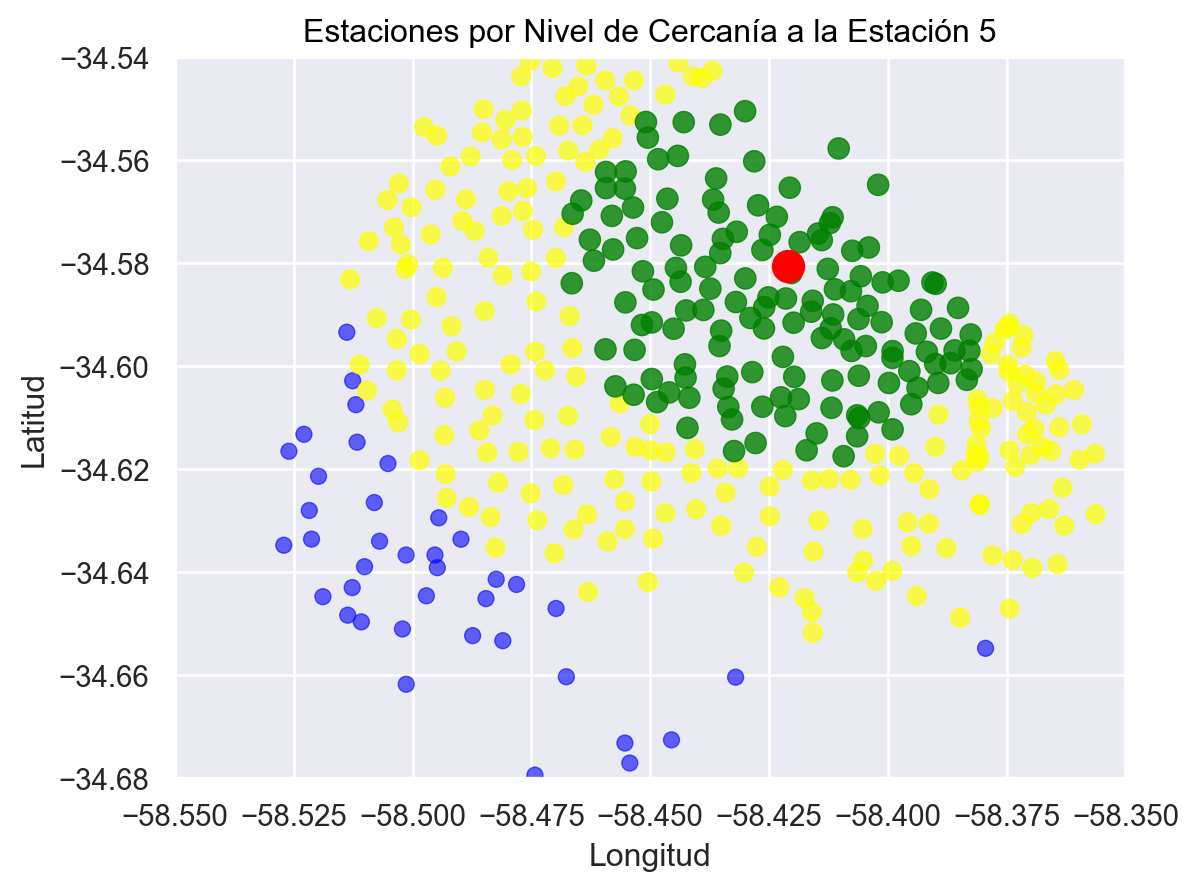

In [75]:
import seaborn.objects as so

# Separar las categorías
df_cerca = df_informacion[df_informacion['etiqueta_cercania'] == 'Cerca']
df_media = df_informacion[df_informacion['etiqueta_cercania'] == 'Media']
df_lejos = df_informacion[df_informacion['etiqueta_cercania'] == 'Lejos']
df_es5 = df_informacion[df_informacion['etiqueta_cercania'] == 'Es estación 5']

# Gráfico con todas las categorías
(
    so.Plot()
    .add(so.Dot(alpha=0.6, color='blue', pointsize=6), data=df_lejos, x='lon', y='lat')
    .add(so.Dot(alpha=0.7, color='yellow', pointsize=7), data=df_media, x='lon', y='lat')
    .add(so.Dot(alpha=0.8, color='green', pointsize=8), data=df_cerca, x='lon', y='lat')
    .add(so.Dot(alpha=1, color='red', pointsize=12), data=df_es5, x='lon', y='lat')
    .label(x='Longitud', y='Latitud', title='Estaciones por Nivel de Cercanía a la Estación 5')
    .limit(x=(-58.55, -58.35), y=(-34.68, -34.54))
    .theme({**so.Plot.config.theme, 'axes.grid': True})
)

In [76]:
# Filtrar omitiendo la estación 5 y obtener las 3 con mejor puntaje
top_3_cercanas = df_informacion[df_informacion['station_id'] != '5'].nlargest(6, 'puntaje_cercania_est5')

display(top_3_cercanas[['station_id', 'lat', 'lon', 'puntaje_cercania_est5', 'etiqueta_cercania']])

,station_id,lat,lon,puntaje_cercania_est5,etiqueta_cercania
377,576,-34.581920,-58.420280,98.726885,Cerca
144,222,-34.575919,-58.418543,95.661367,Cerca
10,14,-34.577424,-58.426387,95.300978,Cerca
390,590,-34.586866,-58.421426,94.550648,Cerca
324,517,-34.574501,-58.424814,94.116116,Cerca
80,124,-34.581114,-58.412625,94.074717,Cerca


In [77]:
%pip install formulaic

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
#import formulaic
from formulaic import Formula

Suponiendo parcialmente que usaremos como variables predictoras las 5 estaciones (tal vez podemos dividir las del 33.33% 'Cerca' en quintiles y obtener las 5 así para aportar un poco de variabilidad por distancia) para explicar origen_5

(siempre y cuando no se puedan usar variables por fuera de estaciones, que llegado el caso deberíamos escalar/encodear)


In [79]:
viajes_por_dia

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577,estacion_anio,dia_semana
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,Verano,Lunes
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,Verano,Martes
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,Verano,Miércoles
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,Verano,Jueves
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,Verano,Viernes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,25,41,72,103,40,19,81,62,36,...,31,20,15,11,27,5,33,18,Verano,Viernes
362,2024-12-28,16,19,26,33,10,4,21,23,23,...,25,29,1,2,5,3,33,6,Verano,Sábado
363,2024-12-29,15,17,15,83,12,8,38,35,26,...,23,27,7,4,1,1,17,9,Verano,Domingo
364,2024-12-30,26,62,55,123,58,12,96,63,39,...,47,24,7,4,9,10,34,15,Verano,Lunes


# Modelo 1: Lineal Multivariado

In [80]:
y, X = (
    Formula('origen_5 ~ destino_576 + destino_222 + destino_14 + destino_124 + destino_517')
    .get_model_matrix(viajes_por_dia)
)

#590 no está

In [81]:
X.head()

,Intercept,destino_576,destino_222,destino_14,destino_124,destino_517
0,1.0,0,10,56,19,46
1,1.0,0,15,89,30,68
2,1.0,0,30,101,34,91
3,1.0,0,41,136,43,80
4,1.0,0,19,101,31,50


In [82]:
y.head()

,origen_5
0,45
1,123
2,144
3,98
4,84


In [83]:
modelo = linear_model.LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [84]:
y_pred = modelo.predict(X)
# Calculando el R^2
r2 = r2_score(y, y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))
raiz_ecm = np.sqrt(ecm)

R^2:  0.6573085059872421
Raiz cuadarada del ECM:  23.52718305537963


In [85]:
media_origen_5 = viajes_por_dia["origen_5"].mean()
print(f"Media de viajes con origen en Plaza Italia: {media_origen_5}")

Media de viajes con origen en Plaza Italia: 94.39071038251366


In [86]:
error_relativo = (raiz_ecm/media_origen_5)*100

error_relativo

np.float64(24.925316230841883)

# Vamos con Modelo 2: Polinómico

In [87]:
formula_poli_3 = Formula(
    'origen_5 ~ poly(destino_576, 3, raw=True) + poly(destino_222, 3, raw=True) + '
    'poly(destino_14, 3, raw=True) + poly(destino_124, 3, raw=True) + '
    'poly(destino_517, 3, raw=True)'
)

In [88]:
y_poly3, X_poly3 = formula_poli_3.get_model_matrix(viajes_por_dia)

In [89]:
modelo_poly3 = linear_model.LinearRegression()
modelo_poly3.fit(X_poly3, y_poly3)

LinearRegression()

In [90]:
modelo_poly3.coef_

array([[ 0.00000000e+00, -2.78317427e-01, -7.23222263e-03,
         1.13837147e-04,  1.84263880e+00, -4.80883729e-02,
         5.76888631e-04,  1.34025483e+00, -9.38770925e-03,
         3.01797812e-05, -8.79265860e-01,  3.54456572e-02,
        -2.93167726e-04, -3.61857776e-01,  1.89059239e-02,
        -1.39082315e-04]])

In [91]:
y_pred_poly3 = modelo_poly3.predict(X_poly3)

In [92]:
r2_poly3 = r2_score(y_poly3, y_pred_poly3)
raiz_ecm_poly3 = np.sqrt(mean_squared_error(y_poly3, y_pred_poly3))
error_relativo_poly3 = (raiz_ecm_poly3 / media_origen_5) * 100

print(f'R^2 Polinómico (Grado 3): {r2_poly3}')
print(f'Raiz ECM Polinómico (Grado 3): {raiz_ecm_poly3}')
print(f'Error Relativo (Grado 3): {error_relativo_poly3:.2f}%')

R^2 Polinómico (Grado 3): 0.6658461847269213
Raiz ECM Polinómico (Grado 3): 23.23226116659748
Error Relativo (Grado 3): 24.61%


Rinden igual, me quedo con el más simple: lineal

Pero debería repensar las variables predictoras a elegir y sus posibles interacciones

¿Y si planteamos correlación? Usar matriz

In [93]:
matriz_corr = viajes_por_dia.corr(numeric_only=True)

correlaciones_con_estacion_5 = matriz_corr['origen_5'].sort_values(ascending=False)
print(correlaciones_con_estacion_5.head(10))

origen_5       1.000000
destino_5      0.975403
destino_29     0.795681
origen_29      0.787160
origen_9       0.779723
destino_14     0.778459
destino_9      0.776930
destino_277    0.770779
origen_14      0.770166
origen_277     0.764003
Name: origen_5, dtype: float64


In [94]:
df_informacion[df_informacion["station_id"].isin(["29","14","9","277"])]

,station_id,lat,lon,capacity,es_estacion_5,distancia_a_est5_km,puntaje_cercania_est5,etiqueta_cercania
7,9,-34.585443,-58.407741,24,False,1.326374,89.728393,Cerca
10,14,-34.577424,-58.426387,30,False,0.606785,95.300978,Cerca
18,29,-34.607941,-58.433557,30,False,3.256970,74.777612,Cerca
183,277,-34.563539,-58.436115,18,False,2.346198,81.830748,Cerca


Las más cercanas: 576, 222, 14, 124, 517

Las más correlacionadas: 29, 14, 9, 277 (TODAS CERCANAS)

Destino 5 debería ser relevante para considerar

# A probar:

## Reemplazar en los modelos con destino u origen de 9, 14, 29 y 277 (en principio destino, pero ver como fundamentar origen) y destino 5

# Hora de última actualizacion - 10:45 AM, martes 17 de febrero de 2026

In [95]:
viajes_con_variable_clima_incorporada.head(5)

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_574,destino_575,destino_576,destino_577,estacion_anio,dia_semana,temp_media,precipitaciones,valoracion_temp,valoracion_prec
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,Verano,Lunes,24.3,0.0,Normal,Sin Lluvia
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,Verano,Martes,23.7,4.1,Normal,Con Lluvia
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,Verano,Miércoles,24.1,1.4,Normal,Con Lluvia
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,Verano,Jueves,24.6,0.0,Normal,Sin Lluvia
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,Verano,Viernes,25.4,0.0,Mucho Calor,Sin Lluvia


In [96]:
df_informacion.head(5)

,station_id,lat,lon,capacity,es_estacion_5,distancia_a_est5_km,puntaje_cercania_est5,etiqueta_cercania
0,2,-34.592424,-58.374710,40,False,4.434498,65.658690,Media
1,3,-34.612207,-58.369129,28,False,5.907115,54.254556,Media
2,4,-34.603008,-58.368856,20,False,5.383199,58.311831,Media
3,5,-34.580550,-58.420954,42,True,0.000000,100.000000,Es estación 5
4,6,-34.628526,-58.369758,20,False,7.100328,45.014169,Media


# *Variables predictoras:*

➡️ Mediana y media de origen de estaciones etiquetadas como cercanas

➡️ Mediana y media de destino de estaciones etiquetadas como cercanas

➡️ Mediana y media de destino de estaciones etiquetadas como medias

➡️ Día de la semana

➡️ Valoración temperatura

➡️ Valoración precipitaciones

❓ Destino 5

2,2,2,1,1,1,1=10

In [97]:
estaciones_cercanas = df_informacion[df_informacion['etiqueta_cercania'] == 'Cerca']['station_id'].astype(str).tolist()
estaciones_medias = df_informacion[df_informacion['etiqueta_cercania'] == 'Media']['station_id'].astype(str).tolist()

In [98]:
origenes_cercanos = [f'origen_{id}' for id in estaciones_cercanas if f'origen_{id}' in viajes_con_variable_clima_incorporada.columns]
destinos_cercanos = [f'destino_{id}' for id in estaciones_cercanas if f'destino_{id}' in viajes_con_variable_clima_incorporada.columns]
destinos_a_media_distancia = [f'destino_{id}' for id in estaciones_medias if f'destino_{id}' in viajes_con_variable_clima_incorporada.columns]

In [99]:
viajes_con_variable_clima_incorporada['media_origenes_cercanos'] = viajes_con_variable_clima_incorporada[origenes_cercanos].mean(axis=1).round(2)
viajes_con_variable_clima_incorporada['mediana_origenes_cercanos'] = viajes_con_variable_clima_incorporada[origenes_cercanos].median(axis=1)

viajes_con_variable_clima_incorporada['media_destinos_cercanos'] = viajes_con_variable_clima_incorporada[destinos_cercanos].mean(axis=1).round(2)
viajes_con_variable_clima_incorporada['mediana_destinos_cercanos'] = viajes_con_variable_clima_incorporada[destinos_cercanos].median(axis=1)

viajes_con_variable_clima_incorporada['media_destinos_medios'] = viajes_con_variable_clima_incorporada[destinos_a_media_distancia].mean(axis=1).round(2)
viajes_con_variable_clima_incorporada['mediana_destinos_medios'] = viajes_con_variable_clima_incorporada[destinos_a_media_distancia].median(axis=1)

In [100]:
#Cálculo manual de media para confirmar que los valores son correctos (restandolo a la columna media_origenes_cercanos, da 0 con un pequeño error)
viajes_con_variable_clima_incorporada[origenes_cercanos].sum(axis=1) / viajes_con_variable_clima_incorporada[origenes_cercanos].count(axis=1).round(2)
viajes_con_variable_clima_incorporada[origenes_cercanos].median(axis=1)

0      14.0
1      30.0
2      33.0
3      36.5
4      33.5
       ... 
361    36.0
362    18.0
363    18.0
364    36.0
365    20.0
Length: 366, dtype: float64

In [101]:
viajes_con_variable_clima_incorporada

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,temp_media,precipitaciones,valoracion_temp,valoracion_prec,media_origenes_cercanos,mediana_origenes_cercanos,media_destinos_cercanos,mediana_destinos_cercanos,media_destinos_medios,mediana_destinos_medios
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,24.3,0.0,Normal,Sin Lluvia,18.52,14.0,18.41,13.0,9.52,7.0
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,23.7,4.1,Normal,Con Lluvia,33.15,30.0,33.21,32.0,23.45,20.0
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,24.1,1.4,Normal,Con Lluvia,37.49,33.0,37.82,34.5,25.23,21.0
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,24.6,0.0,Normal,Sin Lluvia,38.30,36.5,38.43,37.0,24.26,19.0
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,25.4,0.0,Mucho Calor,Sin Lluvia,35.68,33.5,35.69,32.0,23.27,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,25,41,72,103,40,19,81,62,36,...,21.4,0.0,Mucho Frio,Sin Lluvia,39.88,36.0,39.38,36.0,30.54,27.0
362,2024-12-28,16,19,26,33,10,4,21,23,23,...,21.3,0.0,Mucho Frio,Sin Lluvia,21.07,18.0,20.98,17.0,11.50,9.0
363,2024-12-29,15,17,15,83,12,8,38,35,26,...,21.6,0.0,Mucho Frio,Sin Lluvia,21.80,18.0,21.57,18.0,12.36,9.0
364,2024-12-30,26,62,55,123,58,12,96,63,39,...,22.9,0.0,Normal,Sin Lluvia,38.46,36.0,37.61,34.0,25.75,22.0


In [102]:
df_modelo = viajes_con_variable_clima_incorporada[[
    'origen_5',
    'fecha', 
    'dia_semana', 
        'estacion_anio',
    'valoracion_temp', 
    'valoracion_prec', 
    'media_origenes_cercanos', 
    'mediana_origenes_cercanos', 
    'media_destinos_cercanos', 
    'mediana_destinos_cercanos', 
    'media_destinos_medios', 
    'mediana_destinos_medios'
]].copy()

In [103]:
df_modelo

,origen_5,fecha,dia_semana,estacion_anio,valoracion_temp,valoracion_prec,media_origenes_cercanos,mediana_origenes_cercanos,media_destinos_cercanos,mediana_destinos_cercanos,media_destinos_medios,mediana_destinos_medios
0,45,2024-01-01,Lunes,Verano,Normal,Sin Lluvia,18.52,14.0,18.41,13.0,9.52,7.0
1,123,2024-01-02,Martes,Verano,Normal,Con Lluvia,33.15,30.0,33.21,32.0,23.45,20.0
2,144,2024-01-03,Miércoles,Verano,Normal,Con Lluvia,37.49,33.0,37.82,34.5,25.23,21.0
3,98,2024-01-04,Jueves,Verano,Normal,Sin Lluvia,38.30,36.5,38.43,37.0,24.26,19.0
4,84,2024-01-05,Viernes,Verano,Mucho Calor,Sin Lluvia,35.68,33.5,35.69,32.0,23.27,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,103,2024-12-27,Viernes,Verano,Mucho Frio,Sin Lluvia,39.88,36.0,39.38,36.0,30.54,27.0
362,33,2024-12-28,Sábado,Verano,Mucho Frio,Sin Lluvia,21.07,18.0,20.98,17.0,11.50,9.0
363,83,2024-12-29,Domingo,Verano,Mucho Frio,Sin Lluvia,21.80,18.0,21.57,18.0,12.36,9.0
364,123,2024-12-30,Lunes,Verano,Normal,Sin Lluvia,38.46,36.0,37.61,34.0,25.75,22.0


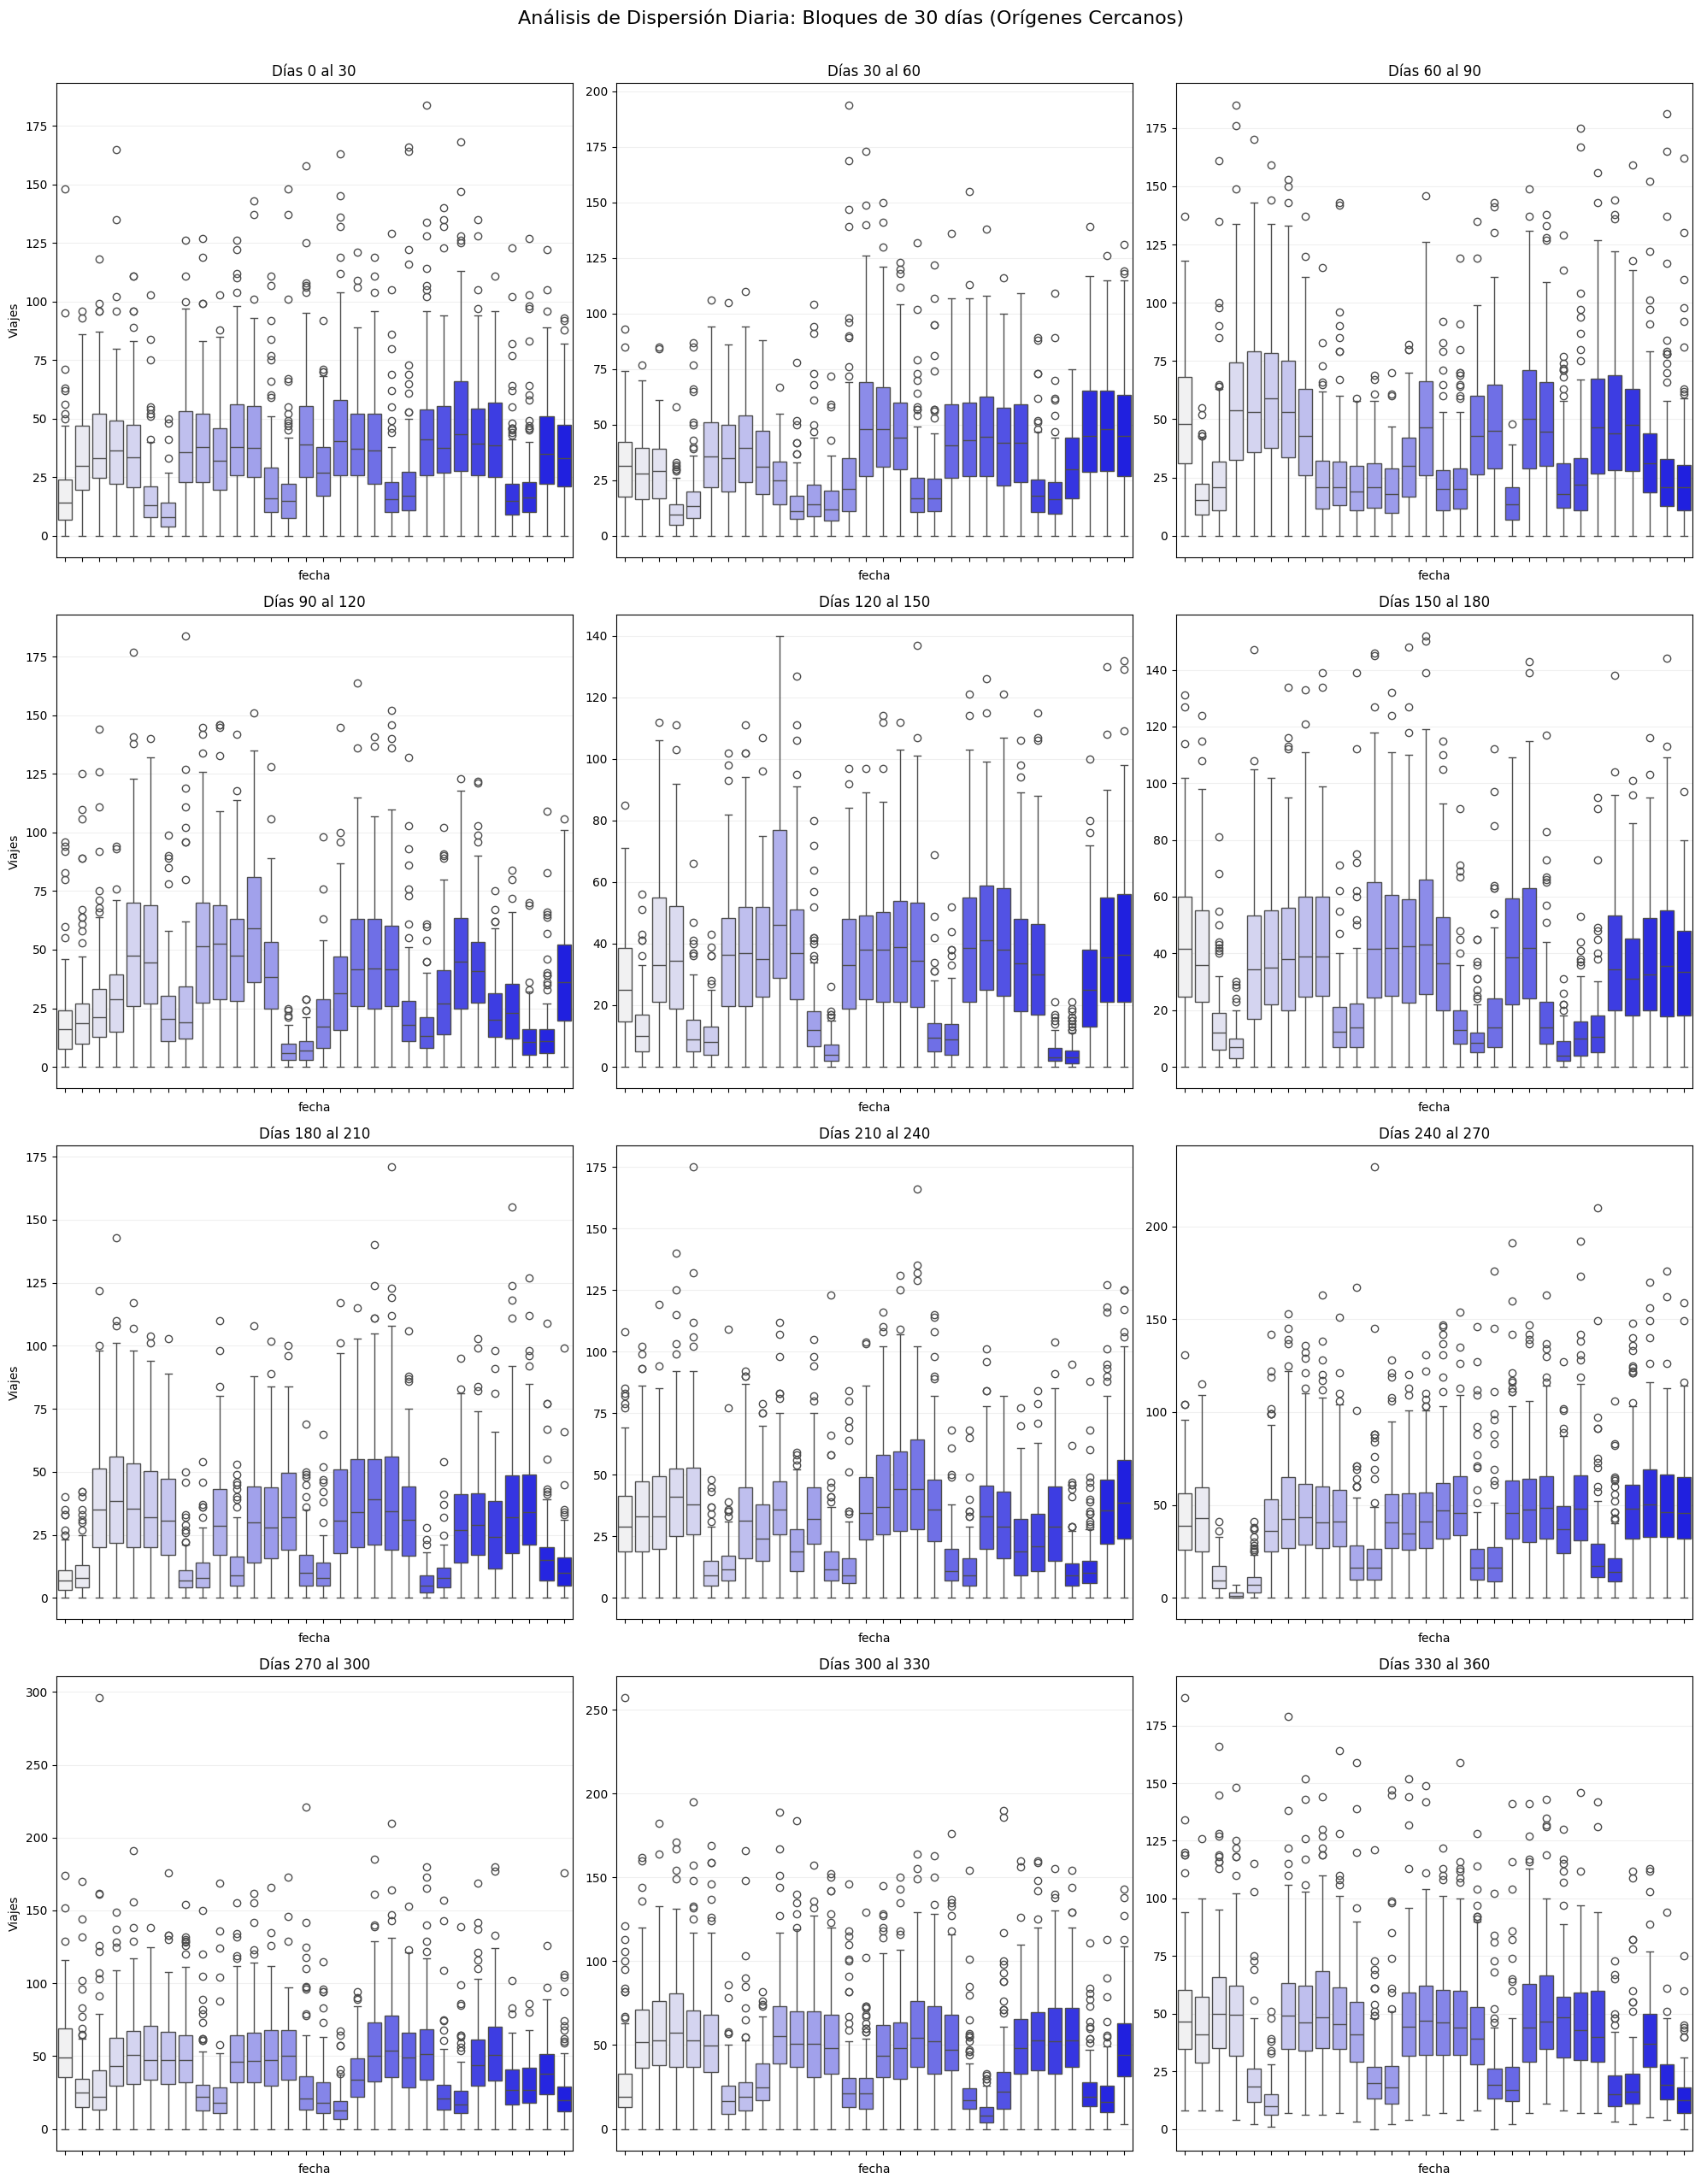

In [104]:
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
axes = axes.flatten()

for i in range(12):
    start_row = i * 30
    end_row = (i + 1) * 30
    
    bloques = viajes_con_variable_clima_incorporada.iloc[start_row:end_row].set_index('fecha')[origenes_cercanos].T
    
    sns.boxplot(data=bloques, ax=axes[i], palette="light:b")
    

    axes[i].set_title(f'Días {start_row} al {end_row}', fontsize=12)
    axes[i].set_xticklabels([])
    axes[i].set_ylabel('Viajes' if i % 3 == 0 else '')
    axes[i].grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.suptitle('Análisis de Dispersión Diaria: Bloques de 30 días (Orígenes Cercanos)', fontsize=16, y=1.02)
plt.show()


    'origen_5',
    'fecha', 
    'dia_semana', 
    'estacion_anio',
    'valoracion_temp', 
    'valoracion_prec', 
    'media_origenes_cercanos', 
    'mediana_origenes_cercanos', 
    'media_destinos_cercanos', 
    'mediana_destinos_cercanos', 
    'media_destinos_medios', 
    'mediana_destinos_medios'


In [128]:
df_modelo

,origen_5,fecha,dia_semana,estacion_anio,valoracion_temp,valoracion_prec,media_origenes_cercanos,mediana_origenes_cercanos,media_destinos_cercanos,mediana_destinos_cercanos,media_destinos_medios,mediana_destinos_medios
0,45,2024-01-01,Lunes,Verano,Normal,Sin Lluvia,18.52,14.0,18.41,13.0,9.52,7.0
1,123,2024-01-02,Martes,Verano,Normal,Con Lluvia,33.15,30.0,33.21,32.0,23.45,20.0
2,144,2024-01-03,Miércoles,Verano,Normal,Con Lluvia,37.49,33.0,37.82,34.5,25.23,21.0
3,98,2024-01-04,Jueves,Verano,Normal,Sin Lluvia,38.30,36.5,38.43,37.0,24.26,19.0
4,84,2024-01-05,Viernes,Verano,Mucho Calor,Sin Lluvia,35.68,33.5,35.69,32.0,23.27,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,103,2024-12-27,Viernes,Verano,Mucho Frio,Sin Lluvia,39.88,36.0,39.38,36.0,30.54,27.0
362,33,2024-12-28,Sábado,Verano,Mucho Frio,Sin Lluvia,21.07,18.0,20.98,17.0,11.50,9.0
363,83,2024-12-29,Domingo,Verano,Mucho Frio,Sin Lluvia,21.80,18.0,21.57,18.0,12.36,9.0
364,123,2024-12-30,Lunes,Verano,Normal,Sin Lluvia,38.46,36.0,37.61,34.0,25.75,22.0


## Probando las medias

In [165]:
y, X = (
    Formula('origen_5 ~ media_origenes_cercanos + media_destinos_cercanos + media_destinos_medios + valoracion_prec + valoracion_temp + dia_semana').get_model_matrix(df_modelo)
)

#origen_5 ~ dia_semana + estacion_anio + valoracion_prec + valoracion_temp + mediana_origenes_cercanos + mediana_destinos_cercanos

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [167]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [168]:
y_pred = modelo.predict(X_test)

In [169]:
r2 = r2_score(y_test, y_pred)
raiz_ecm = np.sqrt(mean_squared_error(y_test, y_pred))
error_relativo = (raiz_ecm / media_origen_5) * 100

In [170]:
media_origen_5 = df_modelo["origen_5"].mean()
print(f"Media de viajes con origen en Plaza Italia: {media_origen_5}")

Media de viajes con origen en Plaza Italia: 94.39071038251366


In [171]:
print(f'R^2: {r2}')
print(f'Raiz cuadrada del ECM: {raiz_ecm}')
print(f"Error relativo: {error_relativo:.2f}%")

R^2: 0.7687715888715232
Raiz cuadrada del ECM: 16.806706772572724
Error relativo: 17.81%


In [172]:
finde = ['Sábado', 'Domingo']

df_modelo['es_finde'] = df_modelo['dia_semana'].isin(finde).astype(int)


In [173]:
df_modelo['destino_5'] = viajes_con_variable_clima_incorporada['destino_5']

In [178]:
formula_poly = """
origen_5 ~ poly(media_origenes_cercanos, 3, raw=True) + poly(media_destinos_cercanos, 3, raw=True) + poly(media_destinos_medios, 3, raw=True)
"""

# 2. Generación de las matrices de diseño (y, X)
y_poly, X_poly = Formula(formula_poly).get_model_matrix(df_modelo)

# 3. División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=2)

# 4. Creación y ajuste del modelo
modelo_poly3 = linear_model.LinearRegression()
modelo_poly3.fit(X_train, y_train)

# 5. Predicción
y_pred = modelo_poly3.predict(X_test)

# 6. Cálculo de métricas
r2 = r2_score(y_test, y_pred)
raiz_ecm = np.sqrt(mean_squared_error(y_test, y_pred))

# Media de referencia de Plaza Italia (Estación 5)
media_origen_5 = df_modelo["origen_5"].mean()
error_relativo = (raiz_ecm / media_origen_5) * 100

# 7. Impresión de resultados
print(f"Media de viajes con origen en Plaza Italia: {media_origen_5}")
print(f'R^2 Polinómico (Test): {r2}')
print(f'Raiz cuadrada del ECM: {raiz_ecm}')
print(f"Error relativo: {error_relativo:.2f}%")

Media de viajes con origen en Plaza Italia: 94.39071038251366
R^2 Polinómico (Test): 0.7682137515923206
Raiz cuadrada del ECM: 16.82696760430451
Error relativo: 17.83%


In [ ]:
y, X = (
    Formula('origen_5 ~ media_destinos_cercanos + media_destinos_medios + destino_5').get_model_matrix(df_modelo) # Sacando media_origenes_cercanos hay poca pérdida de scoring, ¿información redundante por posible colinealidad?
)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
raiz_ecm = np.sqrt(mean_squared_error(y_test, y_pred))
error_relativo = (raiz_ecm / media_origen_5) * 100

media_origen_5 = df_modelo["origen_5"].mean()
print(f"Media de viajes con origen en Plaza Italia: {media_origen_5}")

print(f'R^2: {r2}')
print(f'Raiz cuadrada del ECM: {raiz_ecm}')
print(f"Error relativo: {error_relativo:.2f}%")

Media de viajes con origen en Plaza Italia: 94.39071038251366
R^2: 0.9345797978178735
Raiz cuadrada del ECM: 8.939597522676559
Error relativo: 9.47%


## Poca mejora de suma de medias con polinomio grado 3, ¿esto podría indicar que la relación es lineal?

## Poca influencia de temperatura, precipitaciones y dia de la semana

## Fuerte influencia de destino en la propia estación 5


## ¿Y si usamos temp_media como numerico?

# Observaciones:

## La media mejoró bastante el scoring del modelo, teóricamente tiene sentido argumentativo en cuanto al volumen de viajes en la zona y los muchos outliers tal vez implican esa densidad de viajes

## Cuestion a afinar, ¿es lo ideal que la etiqueta Cerca/Media/Lejos sea basado en 3 tercios del puntaje? Porque esto genera 140 estaciones cercanas, 214 a media distancia y 40 a lejana, podríamos hacerlo de forma que queden 3 segmentos de igual tamaño, pero ¿que es más apropiado? Porqué esto último si bien es más equitativo, le quita casos a cerca y medio que son los que nos importan y le da a lejanos que nisiquiera usaremos